# **Import Library**


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import os
from pillow_heif import register_heif_opener
import numpy as np
import random
import cv2
from scipy.stats import skew
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from rembg import remove
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

c:\Users\FALL-NOU\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
c:\Users\FALL-NOU\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
c:\Users\FALL-NOU\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


# **EDA dan Labeling**

## Dalam kode ini saya meload datanya terlebih dahulu dan melakukan pelabelan untuk setiap data di folder basah, medium, dan kering

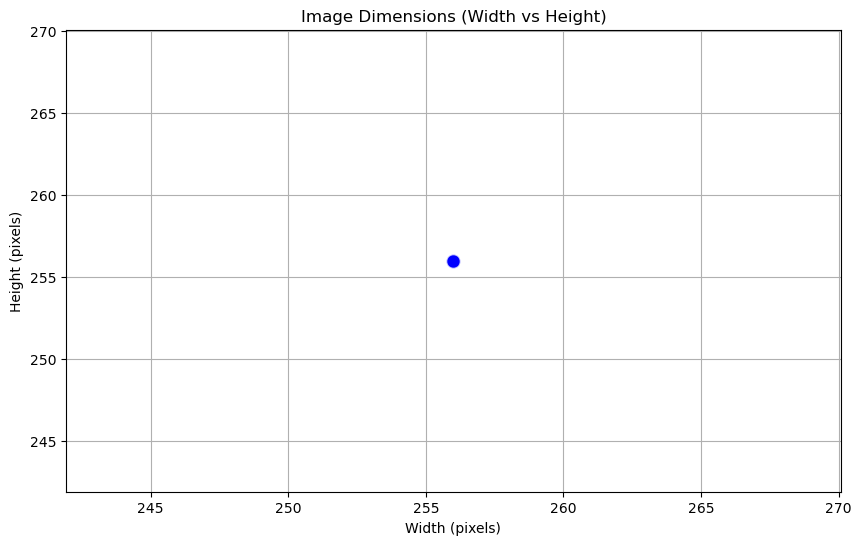

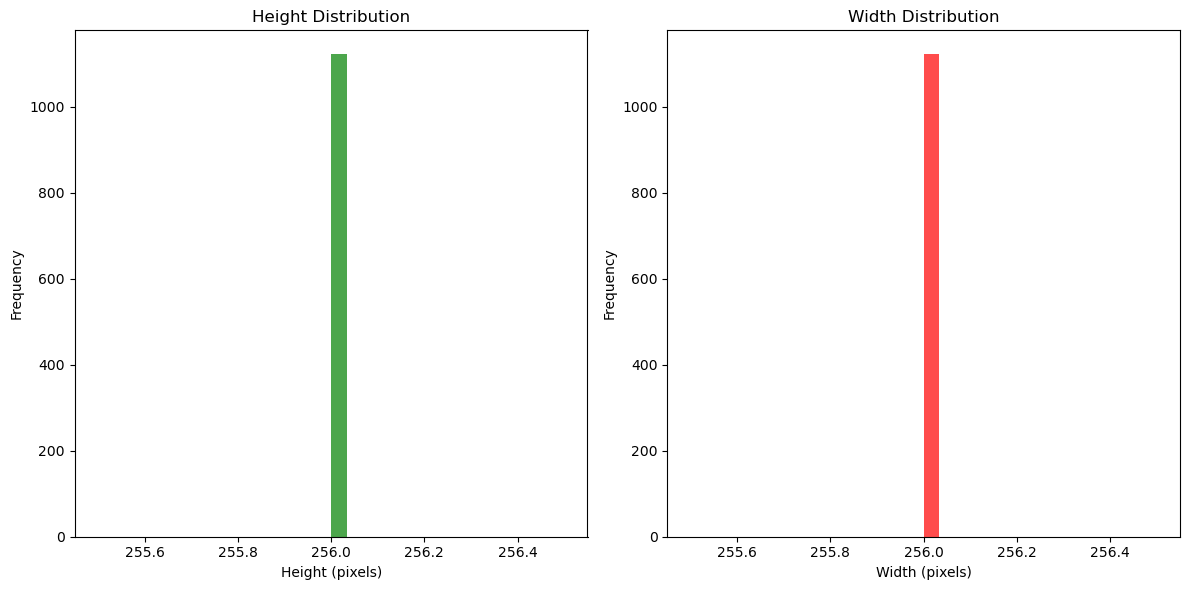

Loaded 1122 images with dimensions ranging from 256 to 256 pixels in height and 256 to 256 pixels in width.


In [195]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define the function to load the dataset
def load_dataset(directory, label_name):
    """Loads images from a directory and returns a list of image arrays and sequentially labeled filenames."""
    images = []
    labels = []
    
    file_list = [filename for filename in os.listdir(directory) if filename.endswith(('.jpg', '.png', '.HEIC'))]
    file_list.sort()  # Optional: to ensure the files are processed in order

    for i, filename in enumerate(file_list, 1):  # Start numbering from 1
        img_path = os.path.join(directory, filename)
        try:
            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)
            labels.append(f"{label_name}_{i}.jpg")
        except Exception as e:
            print(f"Error loading image: {img_path}, {e}")

    return images, labels

# Load images from each category
basah_images, basah_labels = load_dataset(r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\preproccess\basah", 'basah')
medium_images, medium_labels = load_dataset(r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\preproccess\medium", 'medium')
kering_images, kering_labels = load_dataset(r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\preproccess\kering", 'kering')

# Combine the data from all three folders
all_images = basah_images + medium_images + kering_images
all_labels = basah_labels + medium_labels + kering_labels

# Extract the dimensions of each image (height, width)
image_sizes = [img.shape[:2] for img in all_images]  # shape[0] = height, shape[1] = width

# Separate heights and widths for plotting
heights = [size[0] for size in image_sizes]
widths = [size[1] for size in image_sizes]

# Plot the image sizes
plt.figure(figsize=(10, 6))

# Plot a scatter plot of the image sizes (height vs. width)
plt.scatter(widths, heights, alpha=0.6, c='blue', edgecolors='w', s=100)
plt.title("Image Dimensions (Width vs Height)")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True)
plt.show()

# Plot histograms of the height and width distributions
plt.figure(figsize=(12, 6))

# Histogram for heights
plt.subplot(1, 2, 1)
plt.hist(heights, bins=30, color='green', alpha=0.7)
plt.title("Height Distribution")
plt.xlabel("Height (pixels)")
plt.ylabel("Frequency")

# Histogram for widths
plt.subplot(1, 2, 2)
plt.hist(widths, bins=30, color='red', alpha=0.7)
plt.title("Width Distribution")
plt.xlabel("Width (pixels)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Print out the number of images and the range of sizes
print(f"Loaded {len(all_images)} images with dimensions ranging from {min(heights)} to {max(heights)} pixels in height and {min(widths)} to {max(widths)} pixels in width.")


## Kemudian melihat penyebaran label

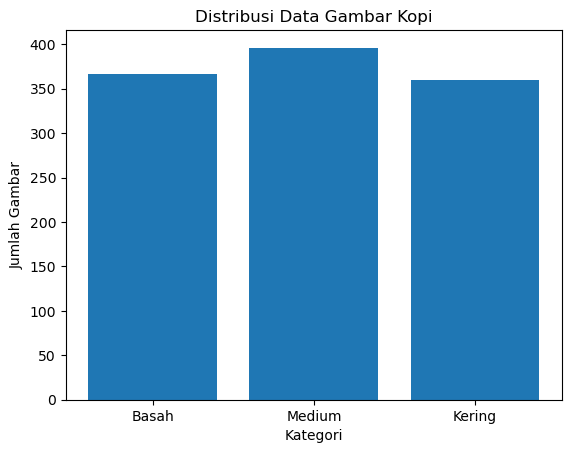

In [145]:
import matplotlib.pyplot as plt

# Count the number of images in each category
basah_count = len(basah_images)
medium_count = len(medium_images)
kering_count = len(kering_images)

# Create a bar chart to visualize the distribution
categories = ['Basah', 'Medium', 'Kering']
counts = [basah_count, medium_count, kering_count]

plt.bar(categories, counts)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Data Gambar Kopi')
plt.show()


## Kode ini digunakan untuk menampilkan contoh gambar dari tiga kategori biji kopi yang berbeda:
Basah, Medium, dan Kering. Fungsi visualize_sample_images ini membantu memvisualisasikan beberapa sampel gambar dari setiap kategori untuk keperluan eksplorasi data atau analisis visual

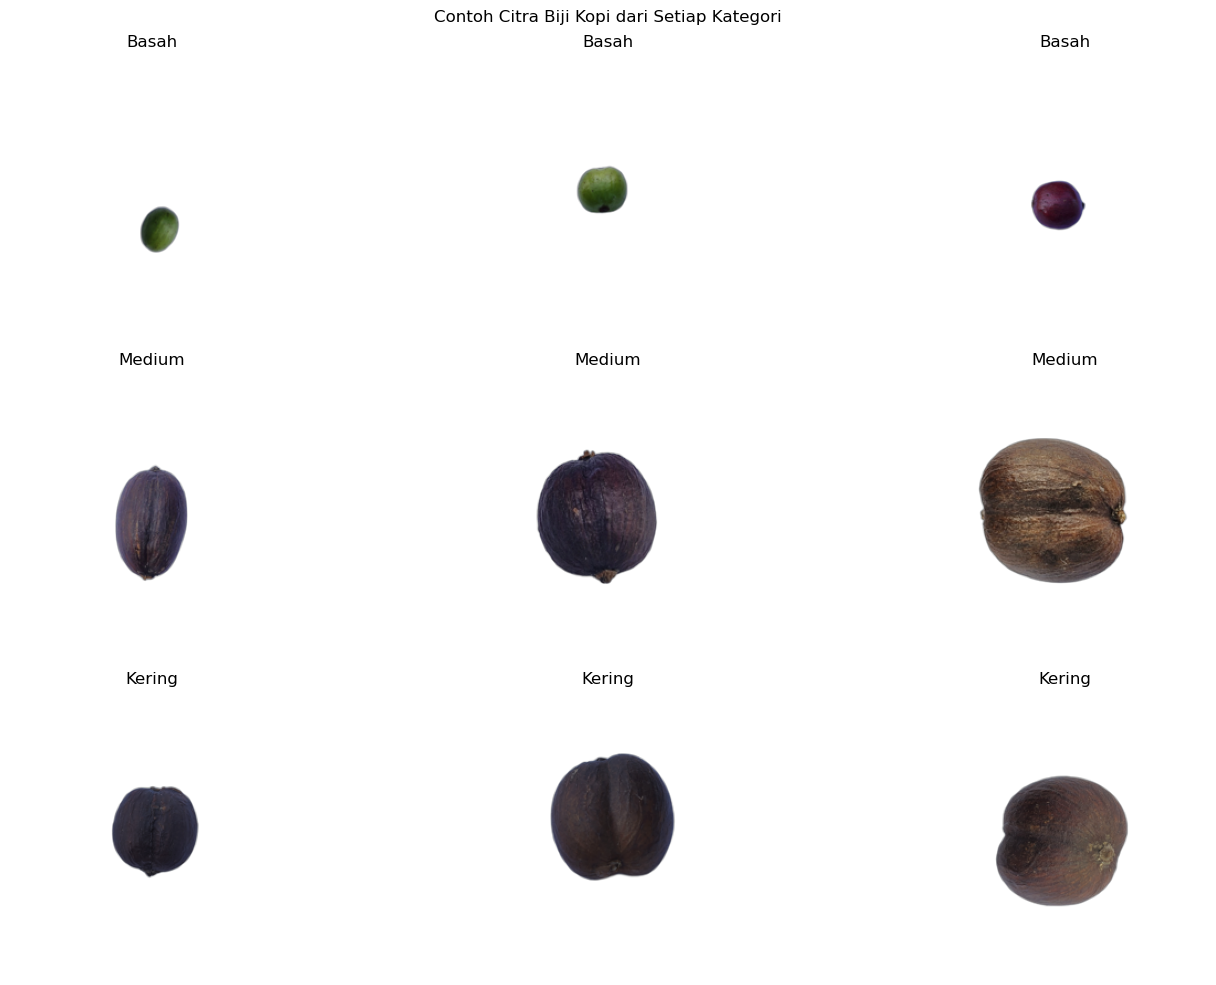

In [146]:
def visualize_sample_images(basah_images, medium_images, kering_images, num_samples=3):
  """Visualizes sample images from each category."""

  fig, axes = plt.subplots(3, num_samples, figsize=(15, 10))
  fig.suptitle("Contoh Citra Biji Kopi dari Setiap Kategori")

  categories = [basah_images, medium_images, kering_images]
  category_names = ["Basah", "Medium", "Kering"]

  for i, (category, category_name) in enumerate(zip(categories, category_names)):
    for j in range(num_samples):
      if j < len(category):
        axes[i, j].imshow(category[j])
        axes[i, j].set_title(f"{category_name}")
        axes[i, j].axis('off')

  plt.tight_layout()
  plt.show()


visualize_sample_images(basah_images, medium_images, kering_images)


## Kode ini digunakan untuk menganalisis distribusi warna dari gambar dalam kategori Basah, Medium, dan Kering.
Alasan penggunaan kode ini adalah untuk memahami karakteristik warna dominan atau pola distribusi warna RGB dalam setiap kategori biji kopi.

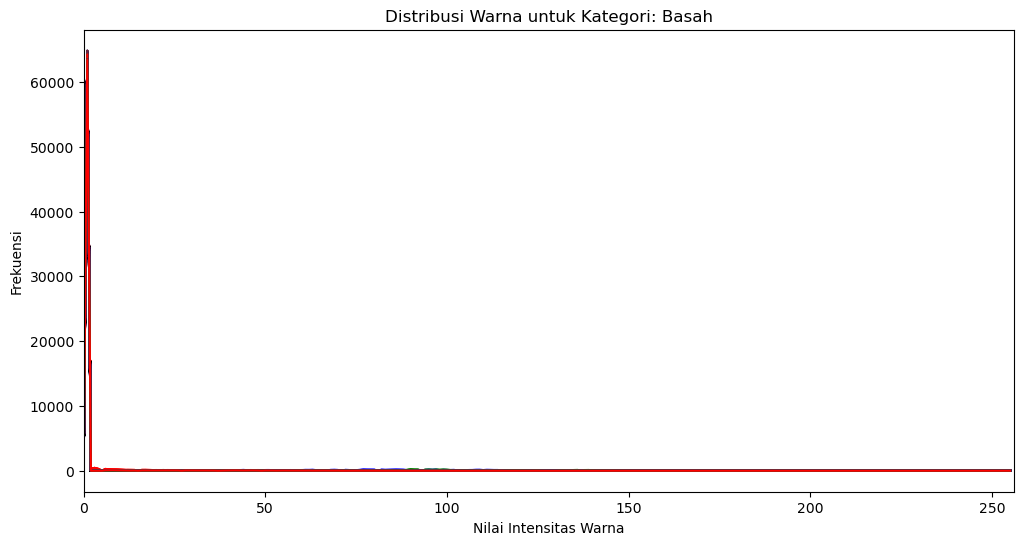

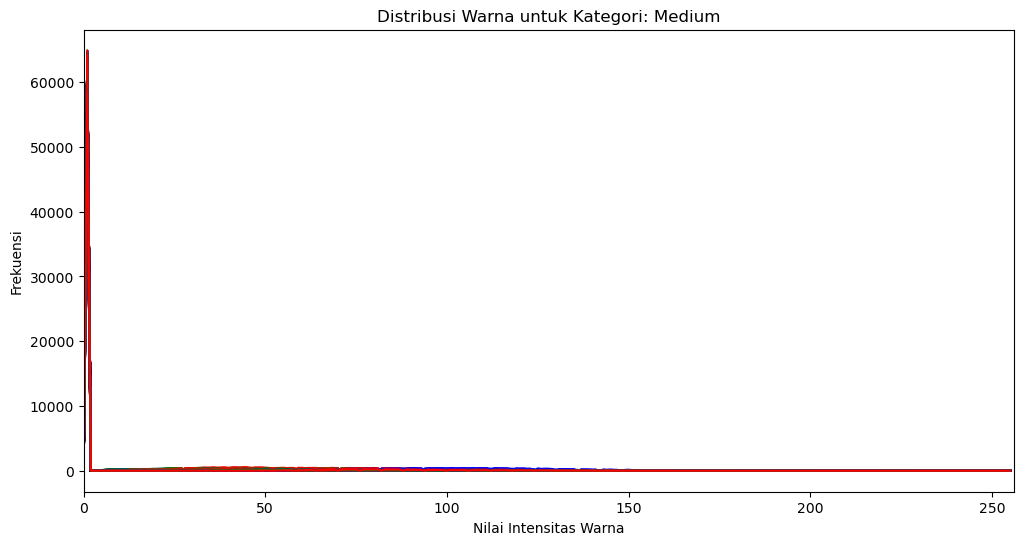

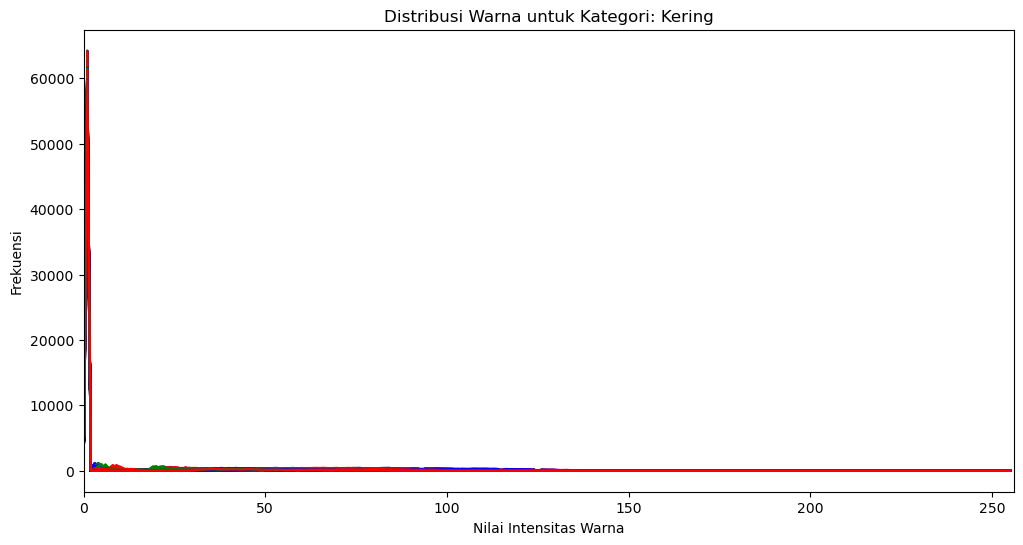

In [147]:
def calculate_color_histogram(image):
  """Calculates the RGB color histogram for a given image."""
  if len(image.shape) == 3:  # Check if the image is color (RGB)
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
      histr = cv2.calcHist([image], [i], None, [256], [0, 256])
      plt.plot(histr, color=col)
      plt.xlim([0, 256])
  else:
    print("Image is grayscale, cannot calculate RGB histogram.")


def analyze_color_distribution(images, label):
  """Calculates and displays color histograms for a set of images."""
  plt.figure(figsize=(12, 6))
  plt.title(f"Distribusi Warna untuk Kategori: {label}")

  for i, img in enumerate(images):
    if len(img.shape) == 3:
      calculate_color_histogram(img)
      plt.xlabel("Nilai Intensitas Warna")
      plt.ylabel("Frekuensi")
  plt.show()


# Analyze color distribution for each category
analyze_color_distribution(basah_images, "Basah")
analyze_color_distribution(medium_images, "Medium")
analyze_color_distribution(kering_images, "Kering")


## Kode ini digunakan untuk menghitung statistik warna rata-rata dan momen warna dari kumpulan gambar dalam setiap kategori (Basah, Medium, dan Kering).
 Alasan penggunaan kode ini adalah untuk mendapatkan informasi statistik warna yang lebih mendalam untuk setiap kategori, sehingga dapat membantu dalam analisis dan pengembangan model.

Rata-rata Warna RGB:
Basah: (3.2474795482197747, 2.6186393362576843, 2.2371291697351006)
Medium: (8.427930774110736, 7.198564163362137, 7.930253847680911)
Kering: (9.694942304823133, 8.516959550645616, 9.547428682115342)


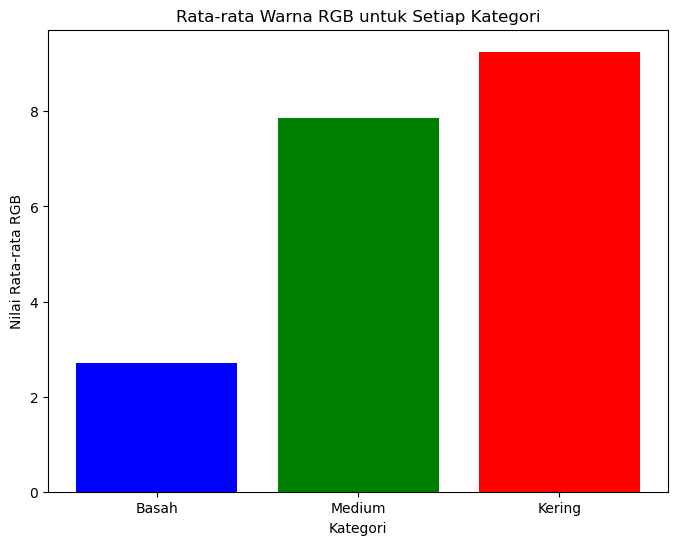

In [148]:
def calculate_average_color(images):
  """Calculates the average RGB color for a set of images."""
  total_r = 0
  total_g = 0
  total_b = 0
  num_images = len(images)

  for img in images:
    # Convert PIL Image to NumPy array
    if isinstance(img, Image.Image):
      img = np.array(img)

    if len(img.shape) == 3:  # Check if the image is color (RGB)
      r_avg = np.mean(img[:, :, 0])
      g_avg = np.mean(img[:, :, 1])
      b_avg = np.mean(img[:, :, 2])
      total_r += r_avg
      total_g += g_avg
      total_b += b_avg

  if num_images > 0:
    avg_r = total_r / num_images
    avg_g = total_g / num_images
    avg_b = total_b / num_images
    return avg_r, avg_g, avg_b
  else:
    return 0, 0, 0


# Calculate average RGB for each category
basah_avg_rgb = calculate_average_color(basah_images)
medium_avg_rgb = calculate_average_color(medium_images)
kering_avg_rgb = calculate_average_color(kering_images)

print("Rata-rata Warna RGB:")
print("Basah:", basah_avg_rgb)
print("Medium:", medium_avg_rgb)
print("Kering:", kering_avg_rgb)

# Visualize average color for each category
# Convert tuples to lists for plotting
basah_avg_rgb = list(basah_avg_rgb)
medium_avg_rgb = list(medium_avg_rgb)
kering_avg_rgb = list(kering_avg_rgb)

plt.figure(figsize=(8, 6))
plt.bar(["Basah", "Medium", "Kering"], [np.mean(basah_avg_rgb), np.mean(medium_avg_rgb), np.mean(kering_avg_rgb)], color=['blue', 'green', 'red']) # Calculate the average of each RGB list for plotting.
plt.title("Rata-rata Warna RGB untuk Setiap Kategori")
plt.xlabel("Kategori")
plt.ylabel("Nilai Rata-rata RGB")
plt.show()


def calculate_color_moments(images):
  """Calculates the mean, standard deviation, and skewness of RGB color channels for a set of images."""
  r_means = []
  g_means = []
  b_means = []
  r_stds = []
  g_stds = []
  b_stds = []
  r_skews = []
  g_skews = []
  b_skews = []

  for img in images:
    if len(img.shape) == 3:  # Check if the image is color (RGB)
      r_means.append(np.mean(img[:, :, 0]))
      g_means.append(np.mean(img[:, :, 1]))
      b_means.append(np.mean(img[:, :, 2]))

      r_stds.append(np.std(img[:, :, 0]))
      g_stds.append(np.std(img[:, :, 1]))
      b_stds.append(np.std(img[:, :, 2]))

      r_skews.append(skew(img[:, :, 0].flatten()))
      g_skews.append(skew(img[:, :, 1].flatten()))
      b_skews.append(skew(img[:, :, 2].flatten()))

  return {
      "r_mean": np.mean(r_means), "g_mean": np.mean(g_means), "b_mean": np.mean(b_means),
      "r_std": np.mean(r_stds), "g_std": np.mean(g_stds), "b_std": np.mean(b_stds),
      "r_skew": np.mean(r_skews), "g_skew": np.mean(g_skews), "b_skew": np.mean(b_skews)
  }

## Kode ini menampilkan rangkuman deskriptif mengenai atribut-atribut utama dan hasil Exploratory Data Analysis (EDA) yang dilakukan pada gambar biji kopi.

Tujuan utama kode ini adalah untuk menjelaskan setiap atribut (warna, tekstur, bentuk) dan menguraikan hasil EDA yang mengidentifikasi perbedaan karakteristik di antara tiga kategori biji kopi: Basah, Medium, dan Kering. Berikut adalah rangkuman yang lebih mudah dipahami:

Atribut Warna (RGB Mean, RGB Std, RGB Skew):

Menjelaskan karakteristik warna tiap kategori, seperti rata-rata intensitas warna merah, hijau, dan biru, serta variasi dan kecenderungan distribusi warna.
Hasil EDA menunjukkan bahwa distribusi warna berbeda antara kategori. Misalnya, biji kopi basah mungkin memiliki nilai rata-rata biru yang lebih tinggi.
Atribut Tekstur (Contrast, Dissimilarity, Homogeneity, Energy, Correlation):

Menjelaskan berbagai atribut tekstur seperti contrast (perbedaan intensitas), homogeneity (keseragaman), dan energy (variasi intensitas).
Hasil EDA menunjukkan bahwa atribut-atribut tekstur ini bervariasi antara kategori. Contohnya, biji kopi kering mungkin memiliki nilai contrast yang lebih tinggi, menandakan tekstur yang lebih kasar.
Atribut Bentuk (Area, Perimeter):

Menjelaskan atribut bentuk seperti luas dan keliling biji kopi.
Hasil EDA menunjukkan bahwa luas dan keliling biji kopi mungkin berbeda antara kategori. Misalnya, biji kopi basah mungkin memiliki luas yang lebih bervariasi.
Korelasi antar Atribut:

Heatmap korelasi membantu menunjukkan hubungan antara atribut, sehingga memudahkan pemilihan fitur yang paling relevan untuk model klasifikasi.
Kesimpulan EDA: Hasil EDA menunjukkan adanya perbedaan yang signifikan pada atribut warna, tekstur, dan bentuk antara kategori Basah, Medium, dan Kering, yang akan sangat berguna untuk membangun model klasifikasi yang akurat.

Kode ini berfungsi sebagai dokumentasi terstruktur untuk atribut dan hasil analisis, membantu memahami perbedaan penting antar kategori.

In [149]:
def extract_texture_features(image):
  """Extracts texture features using GLCM from an image."""
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Calculate GLCM
  glcm = graycomatrix(gray_image, [1], [0], levels=256, symmetric=True, normed=True)

  # Extract texture features from GLCM
  contrast = graycoprops(glcm, 'contrast')[0, 0]
  dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
  homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
  energy = graycoprops(glcm, 'energy')[0, 0]
  correlation = graycoprops(glcm, 'correlation')[0, 0]

  return contrast, dissimilarity, homogeneity, energy, correlation


def analyze_texture_features(images, label):
  """Calculates and prints texture features for a set of images."""
  print(f"\nAnalisa Fitur Tekstur untuk Kategori: {label}")

  contrasts = []
  dissimilarities = []
  homogeneities = []
  energies = []
  correlations = []

  for img in images:
    contrast, dissimilarity, homogeneity, energy, correlation = extract_texture_features(img)
    contrasts.append(contrast)
    dissimilarities.append(dissimilarity)
    homogeneities.append(homogeneity)
    energies.append(energy)
    correlations.append(correlation)

  print("Rata-rata Kontras:", np.mean(contrasts))
  print("Rata-rata Dissimilarity:", np.mean(dissimilarities))
  print("Rata-rata Homogenitas:", np.mean(homogeneities))
  print("Rata-rata Energi:", np.mean(energies))
  print("Rata-rata Korelasi:", np.mean(correlations))


# Analyze texture features for each category
analyze_texture_features(basah_images, "Basah")
analyze_texture_features(medium_images, "Medium")
analyze_texture_features(kering_images, "Kering")

def extract_shape_features(image):
  """Extracts shape features from a binary image (e.g., contour area, perimeter)."""
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    return area, perimeter
  else:
    return 0, 0

def analyze_shape_features(images, label):
  """Calculates and prints shape features for a set of images."""
  print(f"\nAnalisa Fitur Bentuk untuk Kategori: {label}")

  areas = []
  perimeters = []

  for img in images:
    area, perimeter = extract_shape_features(img)
    areas.append(area)
    perimeters.append(perimeter)

  print("Rata-rata Luas:", np.mean(areas))
  print("Rata-rata Keliling:", np.mean(perimeters))


# Analyze shape features for each category
analyze_shape_features(basah_images, "Basah")
analyze_shape_features(medium_images, "Medium")
analyze_shape_features(kering_images, "Kering")


Analisa Fitur Tekstur untuk Kategori: Basah
Rata-rata Kontras: 5.652952895639131
Rata-rata Dissimilarity: 0.21050439301403623
Rata-rata Homogenitas: 0.9786716994365011
Rata-rata Energi: 0.9719863544059892
Rata-rata Korelasi: 0.9669931445962945

Analisa Fitur Tekstur untuk Kategori: Medium
Rata-rata Kontras: 23.25580955077739
Rata-rata Dissimilarity: 0.9513924477619332
Rata-rata Homogenitas: 0.9079123644130608
Rata-rata Energi: 0.8888423478548957
Rata-rata Korelasi: 0.9678844115850755

Analisa Fitur Tekstur untuk Kategori: Kering
Rata-rata Kontras: 20.237242647058828
Rata-rata Dissimilarity: 0.9328611791938998
Rata-rata Homogenitas: 0.8909867292077311
Rata-rata Energi: 0.8592144373543278
Rata-rata Korelasi: 0.972726977355517

Analisa Fitur Bentuk untuk Kategori: Basah
Rata-rata Luas: 12.896174863387978
Rata-rata Keliling: 13.877896710823142

Analisa Fitur Bentuk untuk Kategori: Medium
Rata-rata Luas: 13.728535353535353
Rata-rata Keliling: 18.22550834399281

Analisa Fitur Bentuk untuk K

# **Preprocessing**

## Remove Background dan Resize agar saat pelatihan model lebih cepat dan akurasi bisa lebih bagus

In [9]:
# Folder input dan output
input_folder = r"C:\Users\FALL-NOU\MLTugasKopi\basah"
output_folder = r"C:\Users\FALL-NOU\MLTugasKopi\basah_nobg"  # Folder untuk menyimpan gambar tanpa background

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Proses setiap gambar dalam folder input
for filename in os.listdir(input_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.png")  # Simpan sebagai PNG

        try:
            with Image.open(input_path) as img:
                # Menghapus latar belakang
                output_img = remove(img)

                # Mengubah ukuran gambar menjadi 256x256
                output_img = output_img.resize((256, 256))  # Hapus opsi ANTIALIAS

                # Simpan gambar hasil sebagai PNG
                output_img.save(output_path, format='PNG')
                print(f"Processed: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")


*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************
Processed: basah_1.jpg
*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back

KeyboardInterrupt: 

In [ ]:
# Folder input dan output
input_folder = r"C:\Users\FALL-NOU\MLTugasKopi\medium"
output_folder = r"C:\Users\FALL-NOU\MLTugasKopi\medium_nobg"  # Folder untuk menyimpan gambar tanpa background

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Proses setiap gambar dalam folder input
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".heic")):  # Tambahkan dukungan HEIC
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.png")  # Simpan sebagai PNG

        try:
            if filename.lower().endswith(".heic"):
                heif_file = pillow_heif.read_heif(input_path)
                img = Image.frombytes(
                    heif_file.mode,
                    heif_file.size,
                    heif_file.data,
                    "raw",
                    heif_file.mode
                )
            else:
                img = Image.open(input_path)

            # Menghapus latar belakang
            output_img = remove(img)

            # Mengubah ukuran gambar menjadi 256x256
            output_img = output_img.resize((256, 256))  # Hapus opsi ANTIALIAS

            # Simpan gambar hasil sebagai PNG
            output_img.save(output_path, format='PNG')
            print(f"Processed: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")


In [ ]:
# Folder input dan output
input_folder = r"C:\Users\FALL-NOU\MLTugasKopi\kering"
output_folder = r"C:\Users\FALL-NOU\MLTugasKopi\kering_nobg"  # Folder untuk menyimpan gambar tanpa background

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Proses setiap gambar dalam folder input
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png", ".heic")):  # Tambahkan dukungan HEIC
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.png")  # Simpan sebagai PNG

        try:
            if filename.lower().endswith(".heic"):
                heif_file = pillow_heif.read_heif(input_path)
                img = Image.frombytes(
                    heif_file.mode,
                    heif_file.size,
                    heif_file.data,
                    "raw",
                    heif_file.mode
                )
            else:
                img = Image.open(input_path)

            # Menghapus latar belakang
            output_img = remove(img)

            # Mengubah ukuran gambar menjadi 256x256
            output_img = output_img.resize((256, 256))  # Hapus opsi ANTIALIAS

            # Simpan gambar hasil sebagai PNG
            output_img.save(output_path, format='PNG')
            print(f"Processed: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

## Normalisasi Piksel Images

In [150]:
def normalize_pixels(images):
  """Normalizes pixel values of a list of images to the range [0, 1]."""
  normalized_images = []
  for image in images:
    # Assuming image is a NumPy array
    normalized_image = image.astype("float32") / 255.0
    normalized_images.append(normalized_image)
  return normalized_images

# Example usage (assuming 'basah_images', 'medium_images', 'kering_images' are defined):
normalized_basah_images = normalize_pixels(basah_images)
normalized_medium_images = normalize_pixels(medium_images)
normalized_kering_images = normalize_pixels(kering_images)

# **Sebelum Merancang Model**


## Pembagian Dataset

In [49]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_and_save_dataset(input_folder, output_folder, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """Splits dataset into train, validation, and test sets and saves them into separate folders."""
    # Create train, val, test directories
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(output_folder, split)
        if not os.path.exists(split_path):
            os.makedirs(split_path)

    # Process each class (e.g., basah, medium, kering)
    classes = sorted(os.listdir(input_folder))
    for class_name in classes:
        class_folder = os.path.join(input_folder, class_name)
        if not os.path.isdir(class_folder):
            continue

        # Create class subfolders in train, val, test directories
        for split in ['train', 'val', 'test']:
            class_split_folder = os.path.join(output_folder, split, class_name)
            if not os.path.exists(class_split_folder):
                os.makedirs(class_split_folder)

        # Get all image files in the class folder
        image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        image_paths = [os.path.join(class_folder, f) for f in image_files]

        # Split dataset
        train_paths, temp_paths = train_test_split(image_paths, train_size=train_ratio, random_state=42)
        val_paths, test_paths = train_test_split(temp_paths, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

        # Move images to respective folders
        for file_path, split in zip([train_paths, val_paths, test_paths], ['train', 'val', 'test']):
            for img_path in file_path:
                dest_path = os.path.join(output_folder, split, class_name, os.path.basename(img_path))
                shutil.copy(img_path, dest_path)

        print(f"Processed class '{class_name}': {len(train_paths)} train, {len(val_paths)} val, {len(test_paths)} test images.")

# Paths
input_folder = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\preproccess"
output_folder = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split"

# Split and save dataset
split_and_save_dataset(input_folder, output_folder)


Processed class 'basah': 256 train, 55 val, 55 test images.
Processed class 'kering': 251 train, 54 val, 55 test images.
Processed class 'medium': 277 train, 59 val, 60 test images.


## Fungsi extraksi fitur
Gray Level Co-occurrence Matrix (GLCM): Digunakan untuk analisis tekstur berdasarkan relasi spasial intensitas piksel.

Statistik Intensitas Piksel: Digunakan untuk analisis warna di berbagai ruang warna (RGB, HSV, LAB) menggunakan mean, standard deviation, range, dan percentiles.


In [261]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import LabelEncoder
import os

def extract_color_features(image_path):
    """Extracts enhanced color features from multiple color spaces."""
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError("Image not found or cannot be read.")
            
        # Convert to different color spaces
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        
        features = []
        
        # RGB features
        for channel in cv2.split(img_rgb):
            features.extend([np.mean(channel),  # Mean
                             np.std(channel),   # Standard deviation
                             np.percentile(channel, 25),  # First quartile
                             np.percentile(channel, 75),  # Third quartile
                             np.max(channel) - np.min(channel)  # Range
                            ])
        
        # HSV features
        for channel in cv2.split(img_hsv):
            features.extend([np.mean(channel),
                             np.std(channel)
                            ])
        
        # LAB features
        for channel in cv2.split(img_lab):
            features.extend([np.mean(channel),
                             np.std(channel)
                            ])
        
        # Convert features to named values for DataFrame
        feature_names = []
        color_spaces = ['r', 'g', 'b']
        stats = ['mean', 'std', 'q1', 'q3', 'range']
        
        # RGB feature names
        for color in color_spaces:
            for stat in stats:
                feature_names.append(f'{color}_{stat}')
        
        # HSV feature names
        for i, comp in enumerate(['h', 's', 'v']):
            feature_names.extend([f'{comp}_mean', f'{comp}_std'])
        
        # LAB feature names
        for i, comp in enumerate(['l', 'a', 'b']):
            feature_names.extend([f'{comp}_mean', f'{comp}_std'])
        
        return dict(zip(feature_names, features))
        
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return {name: 0 for name in feature_names}

def extract_texture_features(image_path):
    """Extracts enhanced texture features using multiple GLCM parameters."""
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError("Image not found or cannot be read.")
        
        # Multiple distances and angles for better texture analysis
        distances = [1, 3, 5]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        
        # Compute GLCM
        glcm = graycomatrix(img, distances=distances, angles=angles, 
                           levels=256, symmetric=True, normed=True)
        
        # Properties to calculate
        properties = ['contrast', 'dissimilarity', 'homogeneity', 
                     'energy', 'correlation', 'ASM']
        
        # Dictionary to store features
        features = {}
        
        # Extract features for each property, distance, and angle
        for prop in properties:
            feature = graycoprops(glcm, prop)
            for d_idx, distance in enumerate(distances):
                for a_idx, angle in enumerate(angles):
                    angle_deg = int(angle * 180 / np.pi)
                    key = f'{prop}_d{distance}_a{angle_deg}'
                    features[key] = feature[d_idx, a_idx]
        
        return features
        
    except Exception as e:
        print(f"Error processing texture for image {image_path}: {e}")
        # Create default values for all features
        features = {}
        for prop in ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']:
            for d in distances:
                for a in [0, 45, 90, 135]:
                    features[f'{prop}_d{d}_a{a}'] = 0
        return features

def add_features_to_df(df):
    """Adds enhanced color and texture features to the DataFrame."""
    # Extract all features and create a list of dictionaries
    all_features = []
    
    for idx, row in df.iterrows():
        # Get features for each image
        color_feats = extract_color_features(row['image_path'])
        texture_feats = extract_texture_features(row['image_path'])
        
        # Combine all features
        combined_feats = {**color_feats, **texture_feats}
        all_features.append(combined_feats)
        
        # Print progress
        if (idx + 1) % 10 == 0:
            print(f"Processed {idx + 1} images")
    
    # Convert list of dictionaries to DataFrame
    features_df = pd.DataFrame(all_features)
    
    # Combine with original DataFrame
    result_df = pd.concat([df, features_df], axis=1)
    
    # Label encoding
    le = LabelEncoder()
    result_df['label'] = le.fit_transform(result_df['label'])
    print("Label encoding completed. Encoded labels:")
    print(result_df['label'].head())
    
    return result_df

def create_dataframe_from_folders(folder_paths, labels):
    """Creates a pandas DataFrame with image paths and labels."""
    data = []
    for folder_path, label in zip(folder_paths, labels):
        if not os.path.exists(folder_path):
            print(f"Warning: Folder not found - {folder_path}")
            continue
            
        for filename in os.listdir(folder_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(folder_path, filename)
                data.append([image_path, label])
                
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    return df

# Main execution
if __name__ == "__main__":
    # Folder paths
    train_folder_paths = [
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\train\basah",
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\train\medium",
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\train\kering"
    ]

    validation_folder_paths = [
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\val\basah",
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\val\medium",
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\val\kering"
    ]

    test_folder_paths = [
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test\basah",
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test\medium",
        r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test\kering"
    ]

    # Create DataFrames
    print("Creating training DataFrame...")
    train_df = create_dataframe_from_folders(train_folder_paths, ['basah', 'medium', 'kering'])
    print("Creating validation DataFrame...")
    validation_df = create_dataframe_from_folders(validation_folder_paths, ['basah', 'medium', 'kering'])
    print("Creating test DataFrame...")
    test_df = create_dataframe_from_folders(test_folder_paths, ['basah', 'medium', 'kering'])

    # Add features
    print("Extracting features for training data...")
    train_df = add_features_to_df(train_df)
    print("Extracting features for validation data...")
    validation_df = add_features_to_df(validation_df)
    print("Extracting features for test data...")
    test_df = add_features_to_df(test_df)

    # Save to CSV
    output_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi"
    print("Saving results...")
    train_df.to_csv(os.path.join(output_dir, "train_features_updated.csv"), index=False)
    validation_df.to_csv(os.path.join(output_dir, "validation_features_updated.csv"), index=False)
    test_df.to_csv(os.path.join(output_dir, "test_features_updated.csv"), index=False)

    print("Feature extraction completed!")
    print(f"Training samples: {len(train_df)}")
    print(f"Validation samples: {len(validation_df)}")
    print(f"Test samples: {len(test_df)}")
    print(f"Number of features: {len(train_df.columns) - 2}")


Creating training DataFrame...
Creating validation DataFrame...
Creating test DataFrame...
Extracting features for training data...
Processed 10 images
Processed 20 images
Processed 30 images
Processed 40 images
Processed 50 images
Processed 60 images
Processed 70 images
Processed 80 images
Processed 90 images
Processed 100 images
Processed 110 images
Processed 120 images
Processed 130 images
Processed 140 images
Processed 150 images
Processed 160 images
Processed 170 images
Processed 180 images
Processed 190 images
Processed 200 images
Processed 210 images
Processed 220 images
Processed 230 images
Processed 240 images
Processed 250 images
Processed 260 images
Processed 270 images
Processed 280 images
Processed 290 images
Processed 300 images
Processed 310 images
Processed 320 images
Processed 330 images
Processed 340 images
Processed 350 images
Processed 360 images
Processed 370 images
Processed 380 images
Processed 390 images
Processed 400 images
Processed 410 images
Processed 420 im

# **Merancang Model SVM**

**SVM**

In [262]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the train and test datasets from CSV
train_df = pd.read_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\train_features_updated.csv')
test_df = pd.read_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\validation_features_updated.csv')

# Define the feature columns
feature_columns = [
    'r_mean', 'r_std', 'r_q1', 'r_q3', 'r_range',
    'g_mean', 'g_std', 'g_q1', 'g_q3', 'g_range',
    'b_mean', 'b_std', 'b_q1', 'b_q3', 'b_range',
    'h_mean', 'h_std', 's_mean', 's_std', 'v_mean', 'v_std',
    'l_mean', 'l_std', 'a_mean', 'a_std',
    'contrast_d1_a0', 'contrast_d1_a45', 'contrast_d1_a90', 'contrast_d1_a135',
    'contrast_d3_a0', 'contrast_d3_a45', 'contrast_d3_a90', 'contrast_d3_a135',
    'contrast_d5_a0', 'contrast_d5_a45', 'contrast_d5_a90', 'contrast_d5_a135',
    'dissimilarity_d1_a0', 'dissimilarity_d1_a45', 'dissimilarity_d1_a90', 'dissimilarity_d1_a135',
    'dissimilarity_d3_a0', 'dissimilarity_d3_a45', 'dissimilarity_d3_a90', 'dissimilarity_d3_a135',
    'dissimilarity_d5_a0', 'dissimilarity_d5_a45', 'dissimilarity_d5_a90', 'dissimilarity_d5_a135',
    'homogeneity_d1_a0', 'homogeneity_d1_a45', 'homogeneity_d1_a90', 'homogeneity_d1_a135',
    'homogeneity_d3_a0', 'homogeneity_d3_a45', 'homogeneity_d3_a90', 'homogeneity_d3_a135',
    'homogeneity_d5_a0', 'homogeneity_d5_a45', 'homogeneity_d5_a90', 'homogeneity_d5_a135',
    'energy_d1_a0', 'energy_d1_a45', 'energy_d1_a90', 'energy_d1_a135',
    'energy_d3_a0', 'energy_d3_a45', 'energy_d3_a90', 'energy_d3_a135',
    'energy_d5_a0', 'energy_d5_a45', 'energy_d5_a90', 'energy_d5_a135',
    'correlation_d1_a0', 'correlation_d1_a45', 'correlation_d1_a90', 'correlation_d1_a135',
    'correlation_d3_a0', 'correlation_d3_a45', 'correlation_d3_a90', 'correlation_d3_a135',
    'correlation_d5_a0', 'correlation_d5_a45', 'correlation_d5_a90', 'correlation_d5_a135',
    'ASM_d1_a0', 'ASM_d1_a45', 'ASM_d1_a90', 'ASM_d1_a135',
    'ASM_d3_a0', 'ASM_d3_a45', 'ASM_d3_a90', 'ASM_d3_a135',
    'ASM_d5_a0', 'ASM_d5_a45', 'ASM_d5_a90', 'ASM_d5_a135'
]

# Target column (using already encoded labels in dataset)
target_column = 'label'

# Prepare X (features) and y (target) for training and testing
X_train = train_df[feature_columns]  # Features untuk training
X_test = test_df[feature_columns]    # Features untuk testing
y_train = train_df[target_column]    # Target untuk training
y_test = test_df[target_column]      # Target untuk testing

# Define the SVM model and preprocessing steps in a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC())  # SVM model
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svm__kernel': ['rbf', 'linear', 'poly']
}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform a grid search for the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=3)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_

# Test the model on the test set
y_pred = best_svm_model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Save the best model (including scaler) to a file
joblib.dump(best_svm_model, 'best_svm_model_with_scaler.joblib')
print("Optimized model with scaler saved as 'best_svm_model_with_scaler.joblib'")


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END svm__C=0.1, svm__gamma=1, svm__kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/5] END svm__C=0.1, svm__gamma=1, svm__kernel=rbf;, score=0.357 total time=   0.0s
[CV 3/5] END svm__C=0.1, svm__gamma=1, svm__kernel=rbf;, score=0.357 total time=   0.0s
[CV 4/5] END svm__C=0.1, svm__gamma=1, svm__kernel=rbf;, score=0.350 total time=   0.0s
[CV 5/5] END svm__C=0.1, svm__gamma=1, svm__kernel=rbf;, score=0.353 total time=   0.0s
[CV 1/5] END svm__C=0.1, svm__gamma=1, svm__kernel=linear;, score=0.924 total time=   0.0s
[CV 2/5] END svm__C=0.1, svm__gamma=1, svm__kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END svm__C=0.1, svm__gamma=1, svm__kernel=linear;, score=0.898 total time=   0.0s
[CV 4/5] END svm__C=0.1, svm__gamma=1, svm__kernel=linear;, score=0.917 total time=   0.0s
[CV 5/5] END svm__C=0.1, svm__gamma=1, svm__kernel=linear;, score=0.853 total time=   0.0s
[CV 1/5] END svm__C=0.1, svm__gamma=1, svm_

## Menguji model

                                            image_path  label  predicted_label
0    C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      0                0
1    C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      0                0
2    C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      0                0
3    C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      0                0
4    C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      0                0
..                                                 ...    ...              ...
165  C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      1                1
166  C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      1                1
167  C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      1                1
168  C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      1                1
169  C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\...      1                1

[170 rows x 3 columns]
Classification Report:
     

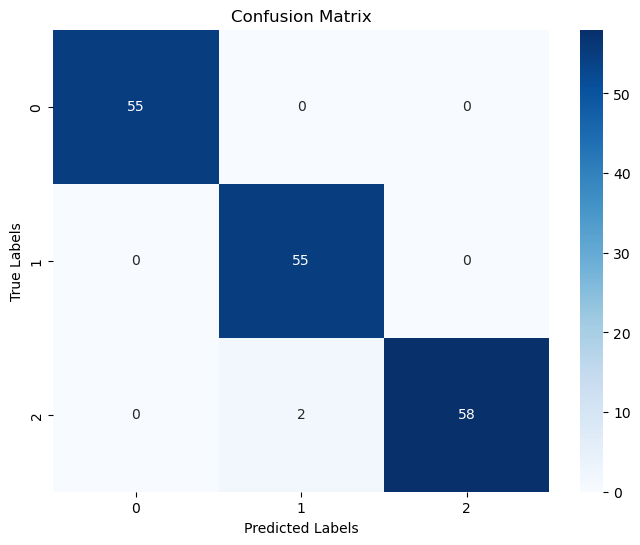

Correctly Classified Examples:


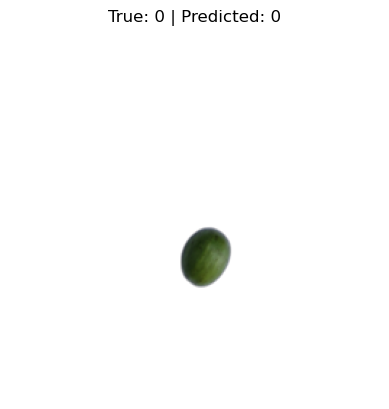

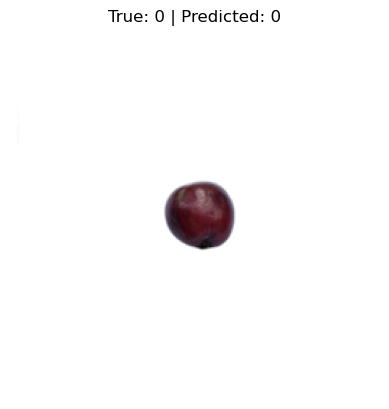

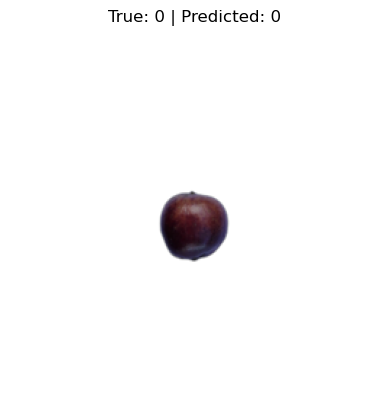

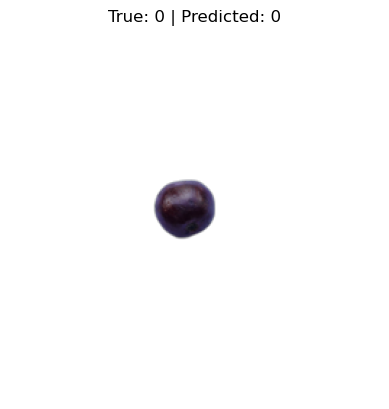

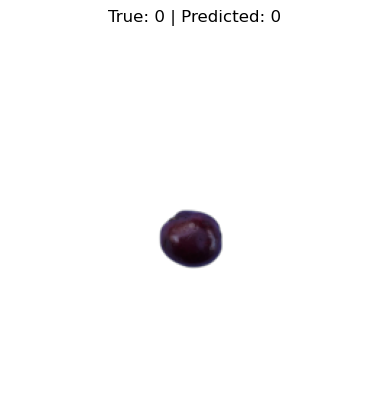

Misclassified Examples:


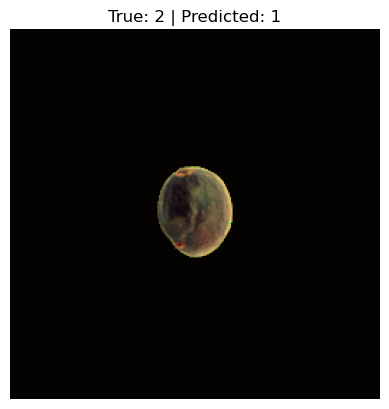

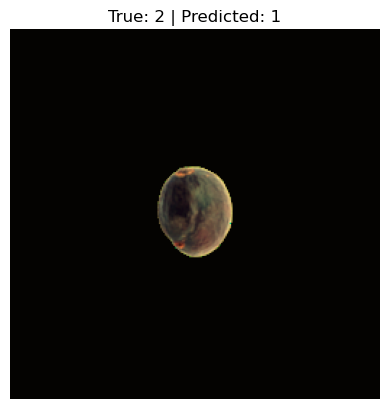

In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from PIL import Image
import os

# Load the saved model (which includes the scaler and label encoder)
best_svm_model = joblib.load(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\models\best_svm_model_with_scaler.joblib')

# Load the test data (features) you want to predict on
test_data = pd.read_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\test_features_updated.csv')

# Define the feature columns (same as used during training)
feature_columns = [
    'r_mean', 'r_std', 'r_q1', 'r_q3', 'r_range',
    'g_mean', 'g_std', 'g_q1', 'g_q3', 'g_range',
    'b_mean', 'b_std', 'b_q1', 'b_q3', 'b_range',
    'h_mean', 'h_std', 's_mean', 's_std', 'v_mean', 'v_std',
    'l_mean', 'l_std', 'a_mean', 'a_std',
    'contrast_d1_a0', 'contrast_d1_a45', 'contrast_d1_a90', 'contrast_d1_a135',
    'contrast_d3_a0', 'contrast_d3_a45', 'contrast_d3_a90', 'contrast_d3_a135',
    'contrast_d5_a0', 'contrast_d5_a45', 'contrast_d5_a90', 'contrast_d5_a135',
    'dissimilarity_d1_a0', 'dissimilarity_d1_a45', 'dissimilarity_d1_a90', 'dissimilarity_d1_a135',
    'dissimilarity_d3_a0', 'dissimilarity_d3_a45', 'dissimilarity_d3_a90', 'dissimilarity_d3_a135',
    'dissimilarity_d5_a0', 'dissimilarity_d5_a45', 'dissimilarity_d5_a90', 'dissimilarity_d5_a135',
    'homogeneity_d1_a0', 'homogeneity_d1_a45', 'homogeneity_d1_a90', 'homogeneity_d1_a135',
    'homogeneity_d3_a0', 'homogeneity_d3_a45', 'homogeneity_d3_a90', 'homogeneity_d3_a135',
    'homogeneity_d5_a0', 'homogeneity_d5_a45', 'homogeneity_d5_a90', 'homogeneity_d5_a135',
    'energy_d1_a0', 'energy_d1_a45', 'energy_d1_a90', 'energy_d1_a135',
    'energy_d3_a0', 'energy_d3_a45', 'energy_d3_a90', 'energy_d3_a135',
    'energy_d5_a0', 'energy_d5_a45', 'energy_d5_a90', 'energy_d5_a135',
    'correlation_d1_a0', 'correlation_d1_a45', 'correlation_d1_a90', 'correlation_d1_a135',
    'correlation_d3_a0', 'correlation_d3_a45', 'correlation_d3_a90', 'correlation_d3_a135',
    'correlation_d5_a0', 'correlation_d5_a45', 'correlation_d5_a90', 'correlation_d5_a135',
    'ASM_d1_a0', 'ASM_d1_a45', 'ASM_d1_a90', 'ASM_d1_a135',
    'ASM_d3_a0', 'ASM_d3_a45', 'ASM_d3_a90', 'ASM_d3_a135',
    'ASM_d5_a0', 'ASM_d5_a45', 'ASM_d5_a90', 'ASM_d5_a135'
]

# Prepare the features (X) for prediction
X_new = test_data[feature_columns]

# Predict using the loaded model
predictions = best_svm_model.predict(X_new)

# Convert numeric predictions back to original labels using the label encoder in the pipeline
predicted_labels = best_svm_model.classes_[predictions]

# Create a DataFrame with image paths, actual labels, and predicted labels
results_df = test_data[['image_path', 'label']].copy()
results_df['predicted_label'] = predicted_labels

# Save the results to a new CSV
results_df.to_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\predictions.csv', index=False)

# Print the results DataFrame
print(results_df)

# Classification Report
cr = classification_report(test_data['label'], predicted_labels)
print("Classification Report:\n", cr)

# Confusion Matrix
cm = confusion_matrix(test_data['label'], predicted_labels)
print("Confusion Matrix:\n", cm)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_svm_model.classes_, yticklabels=best_svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Find correctly and incorrectly classified instances
correctly_classified = results_df[results_df['label'] == results_df['predicted_label']]
misclassified = results_df[results_df['label'] != results_df['predicted_label']]

# Display example images of correctly classified instances
print("Correctly Classified Examples:")
for idx, row in correctly_classified.head(5).iterrows():
    img_path = row['image_path']
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"True: {row['label']} | Predicted: {row['predicted_label']}")
        plt.axis('off')
        plt.show()

# Display example images of misclassified instances
print("Misclassified Examples:")
for idx, row in misclassified.head(5).iterrows():
    img_path = row['image_path']
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"True: {row['label']} | Predicted: {row['predicted_label']}")
        plt.axis('off')
        plt.show()


## Eror Analisis

In [264]:
import pandas as pd

# Load the dataset where features are stored
test_data = pd.read_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\test_features_updated.csv')

# Define the image paths you want to filter
image_paths_to_display = [
    'C:\\Users\\FALL-NOU\\Documents\\KULIAH\\SEMESTER 7\\MachineLearning\\dataset\\dataset_split\\test\\medium\\medium_181.png',
    'C:\\Users\\FALL-NOU\\Documents\\KULIAH\\SEMESTER 7\\MachineLearning\\dataset\\dataset_split\\test\\medium\\medium_181_adjusted_92.png'
]

# Filter the dataset to show data for the specific image paths
filtered_data = test_data[test_data['image_path'].isin(image_paths_to_display)]

# Display the filtered data in full
print(filtered_data.to_string(index=False))


Empty DataFrame
Columns: [image_path, label, r_mean, r_std, r_q1, r_q3, r_range, g_mean, g_std, g_q1, g_q3, g_range, b_mean, b_std, b_q1, b_q3, b_range, h_mean, h_std, s_mean, s_std, v_mean, v_std, l_mean, l_std, a_mean, a_std, contrast_d1_a0, contrast_d1_a45, contrast_d1_a90, contrast_d1_a135, contrast_d3_a0, contrast_d3_a45, contrast_d3_a90, contrast_d3_a135, contrast_d5_a0, contrast_d5_a45, contrast_d5_a90, contrast_d5_a135, dissimilarity_d1_a0, dissimilarity_d1_a45, dissimilarity_d1_a90, dissimilarity_d1_a135, dissimilarity_d3_a0, dissimilarity_d3_a45, dissimilarity_d3_a90, dissimilarity_d3_a135, dissimilarity_d5_a0, dissimilarity_d5_a45, dissimilarity_d5_a90, dissimilarity_d5_a135, homogeneity_d1_a0, homogeneity_d1_a45, homogeneity_d1_a90, homogeneity_d1_a135, homogeneity_d3_a0, homogeneity_d3_a45, homogeneity_d3_a90, homogeneity_d3_a135, homogeneity_d5_a0, homogeneity_d5_a45, homogeneity_d5_a90, homogeneity_d5_a135, energy_d1_a0, energy_d1_a45, energy_d1_a90, energy_d1_a135, ener

In [265]:
import pandas as pd

# Load the dataset where features are stored
test_data = pd.read_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\test_features_updated.csv')

# Filter data for the 'basah' category (assuming '1' is the label for 'basah')
basah_data = test_data[test_data['label'] == 1]

# Calculate the mean for each feature in 'basah' category
mean_basah = basah_data.drop(columns=['image_path', 'label']).mean()

# Load the results of predictions
results_df = pd.read_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\predictions.csv')

# Find misclassified instances (incorrect predictions)
misclassified_data = results_df[results_df['label'] != results_df['predicted_label']]

# Get the image paths of the misclassified instances
misclassified_image_paths = misclassified_data['image_path'].tolist()

# Filter the test data to show the rows corresponding to the misclassified image paths
misclassified_features = test_data[test_data['image_path'].isin(misclassified_image_paths)]

# Display a clear and structured comparison

# Display Rata-Rata Fitur dari Kategori 'Basah'
print("\n### Rata-Rata Fitur dari Kategori 'Basah' ###\n")
print(mean_basah.to_frame().T.to_string(index=False))  # Convert to DataFrame and display neatly

# Display Data yang Salah Diprediksi
print("\n### Data yang Salah Diprediksi ###\n")
print(misclassified_data[['image_path', 'label', 'predicted_label']].to_string(index=False))

# Perbandingan Fitur Data yang Salah Diprediksi dengan Rata-Rata 'Basah'
print("\n### Perbandingan Fitur Data yang Salah Diprediksi dengan Rata-Rata 'Basah' ###\n")
for idx, row in misclassified_features.iterrows():
    print(f"\nPerbandingan untuk gambar: {row['image_path']}")
    print("="*100)
    for column in mean_basah.index:
        feature_value = row[column]
        mean_value = mean_basah[column]
        difference = feature_value - mean_value
        print(f"{column: <40}: {feature_value: .4f} (misclassified) vs {mean_value: .4f} (mean 'basah') | Difference: {difference: .4f}")
    print("="*100)



### Rata-Rata Fitur dari Kategori 'Basah' ###

  r_mean     r_std  r_q1     r_q3    r_range   g_mean     g_std  g_q1     g_q3    g_range     b_mean    b_std  b_q1     b_q3    b_range    h_mean     h_std   s_mean    s_std    v_mean     v_std  l_mean     l_std     a_mean    a_std  contrast_d1_a0  contrast_d1_a45  contrast_d1_a90  contrast_d1_a135  contrast_d3_a0  contrast_d3_a45  contrast_d3_a90  contrast_d3_a135  contrast_d5_a0  contrast_d5_a45  contrast_d5_a90  contrast_d5_a135  dissimilarity_d1_a0  dissimilarity_d1_a45  dissimilarity_d1_a90  dissimilarity_d1_a135  dissimilarity_d3_a0  dissimilarity_d3_a45  dissimilarity_d3_a90  dissimilarity_d3_a135  dissimilarity_d5_a0  dissimilarity_d5_a45  dissimilarity_d5_a90  dissimilarity_d5_a135  homogeneity_d1_a0  homogeneity_d1_a45  homogeneity_d1_a90  homogeneity_d1_a135  homogeneity_d3_a0  homogeneity_d3_a45  homogeneity_d3_a90  homogeneity_d3_a135  homogeneity_d5_a0  homogeneity_d5_a45  homogeneity_d5_a90  homogeneity_d5_a135  energy_d1_a

In [266]:
import pandas as pd

# Load the dataset where features are stored
test_data = pd.read_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\test_features_updated.csv')

# Filter data for the 'medium' category (assuming '2' is the label for 'medium')
medium_data = test_data[test_data['label'] == 2]

# Calculate the mean for each feature in 'medium' category
mean_medium = medium_data.drop(columns=['image_path', 'label']).mean()

# Load the results of predictions
results_df = pd.read_csv(r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataframe_extraksi\predictions.csv')

# Find misclassified instances (incorrect predictions)
misclassified_data = results_df[results_df['label'] != results_df['predicted_label']]

# Get the image paths of the misclassified instances
misclassified_image_paths = misclassified_data['image_path'].tolist()

# Filter the test data to show the rows corresponding to the misclassified image paths
misclassified_features = test_data[test_data['image_path'].isin(misclassified_image_paths)]

# Display a clear and structured comparison

# Display Rata-Rata Fitur dari Kategori 'Medium'
print("\n### Rata-Rata Fitur dari Kategori 'Medium' ###\n")
print(mean_medium.to_frame().T.to_string(index=False))  # Convert to DataFrame and display neatly

# Display Data yang Salah Diprediksi
print("\n### Data yang Salah Diprediksi ###\n")
print(misclassified_data[['image_path', 'label', 'predicted_label']].to_string(index=False))

# Perbandingan Fitur Data yang Salah Diprediksi dengan Rata-Rata 'Medium'
print("\n### Perbandingan Fitur Data yang Salah Diprediksi dengan Rata-Rata 'Medium' ###\n")
for idx, row in misclassified_features.iterrows():
    print(f"\nPerbandingan untuk gambar: {row['image_path']}")
    print("="*100)
    for column in mean_medium.index:
        feature_value = row[column]
        mean_value = mean_medium[column]
        difference = feature_value - mean_value
        print(f"{column: <40}: {feature_value: .4f} (misclassified) vs {mean_value: .4f} (mean 'medium') | Difference: {difference: .4f}")
    print("="*100)



### Rata-Rata Fitur dari Kategori 'Medium' ###

 r_mean     r_std  r_q1     r_q3    r_range   g_mean     g_std     g_q1     g_q3    g_range     b_mean    b_std  b_q1  b_q3  b_range    h_mean     h_std    s_mean     s_std   v_mean     v_std   l_mean     l_std     a_mean    a_std  contrast_d1_a0  contrast_d1_a45  contrast_d1_a90  contrast_d1_a135  contrast_d3_a0  contrast_d3_a45  contrast_d3_a90  contrast_d3_a135  contrast_d5_a0  contrast_d5_a45  contrast_d5_a90  contrast_d5_a135  dissimilarity_d1_a0  dissimilarity_d1_a45  dissimilarity_d1_a90  dissimilarity_d1_a135  dissimilarity_d3_a0  dissimilarity_d3_a45  dissimilarity_d3_a90  dissimilarity_d3_a135  dissimilarity_d5_a0  dissimilarity_d5_a45  dissimilarity_d5_a90  dissimilarity_d5_a135  homogeneity_d1_a0  homogeneity_d1_a45  homogeneity_d1_a90  homogeneity_d1_a135  homogeneity_d3_a0  homogeneity_d3_a45  homogeneity_d3_a90  homogeneity_d3_a135  homogeneity_d5_a0  homogeneity_d5_a45  homogeneity_d5_a90  homogeneity_d5_a135  energy_d1_a

In [260]:
import cv2
import numpy as np

# Fungsi augmentasi halus
def augment_image_smoothly(image_path, target_mean, target_std):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
    
    # Ekstrak fitur dari gambar asli
    r_channel = image[:, :, 0]
    g_channel = image[:, :, 1]
    
    # Menghitung rata-rata dan standar deviasi untuk setiap kanal warna
    r_mean_current = np.mean(r_channel)
    g_mean_current = np.mean(g_channel)
    
    r_std_current = np.std(r_channel)
    g_std_current = np.std(g_channel)
    
    # Penyesuaian kanal merah (r) dan hijau (g) agar mendekati target mean dan std
    r_channel = ((r_channel - r_mean_current) / r_std_current) * target_std[0] + target_mean[0]
    g_channel = ((g_channel - g_mean_current) / g_std_current) * target_std[1] + target_mean[1]
    
    # Gabungkan kembali kanal warna menjadi gambar
    image[:, :, 0] = r_channel
    image[:, :, 1] = g_channel
    
    # Ubah gambar kembali ke format BGR untuk disimpan
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image

# Path gambar yang akan disesuaikan
image_paths = [
    r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test\medium\medium_181.png',
    r'C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test\medium\medium_181_adjusted_92.png'
]

# Tentukan target rata-rata dan standar deviasi dari kategori 'medium'
mean_medium = [8.0566, 6.8803]  # Rata-rata untuk r dan g kanal pada kategori 'medium'
std_medium = [19.7149, 16.8848]  # Standar deviasi untuk r dan g kanal pada kategori 'medium'

# Terapkan augmentasi halus dan simpan gambar yang telah disesuaikan
augmented_images = []
for image_path in image_paths:
    augmented_image = augment_image_smoothly(image_path, mean_medium, std_medium)
    augmented_images.append(augmented_image)
    cv2.imwrite(f'augmented_{os.path.basename(image_path)}', augmented_image)  # Simpan gambar yang telah disesuaikan


# **CNN**

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enable GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Parameters
IMG_WIDTH, IMG_HEIGHT = 256, 256
BATCH_SIZE = 16  # Reduced batch size for memory efficiency
NUM_CLASSES = 3

# Data paths
train_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\train"
val_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\val"

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Build original model architecture
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    ModelCheckpoint(
        'best_model.h5',
        monitor='val_loss',
        save_best_only=True
    )
]

# Calculate steps per epoch
STEPS_PER_EPOCH = train_generator.samples // BATCH_SIZE
VALIDATION_STEPS = validation_generator.samples // BATCH_SIZE

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    epochs=10,
    callbacks=callbacks
)

# Evaluate model
loss, accuracy = model.evaluate(validation_generator)
print("\nTest Loss:", loss)
print("Test Accuracy:", accuracy)

Found 784 images belonging to 3 classes.
Found 168 images belonging to 3 classes.
Epoch 1/10
49/49 [==============================] - 4s 59ms/step - loss: 0.8091 - accuracy: 0.5982 - val_loss: 0.5228 - val_accuracy: 0.7063
Epoch 2/10
49/49 [==============================] - 3s 55ms/step - loss: 0.4390 - accuracy: 0.7717 - val_loss: 0.3372 - val_accuracy: 0.8125
Epoch 3/10
49/49 [==============================] - 2s 49ms/step - loss: 0.3279 - accuracy: 0.8648 - val_loss: 0.3674 - val_accuracy: 0.8625
Epoch 4/10
49/49 [==============================] - 3s 55ms/step - loss: 0.1823 - accuracy: 0.9298 - val_loss: 0.1742 - val_accuracy: 0.9375
Epoch 5/10
49/49 [==============================] - 3s 54ms/step - loss: 0.1455 - accuracy: 0.9490 - val_loss: 0.1697 - val_accuracy: 0.9250
Epoch 6/10
49/49 [==============================] - 3s 50ms/step - loss: 0.0878 - accuracy: 0.9668 - val_loss: 0.3091 - val_accuracy: 0.8875
Epoch 7/10
49/49 [==============================] - 3s 54ms/step - loss:

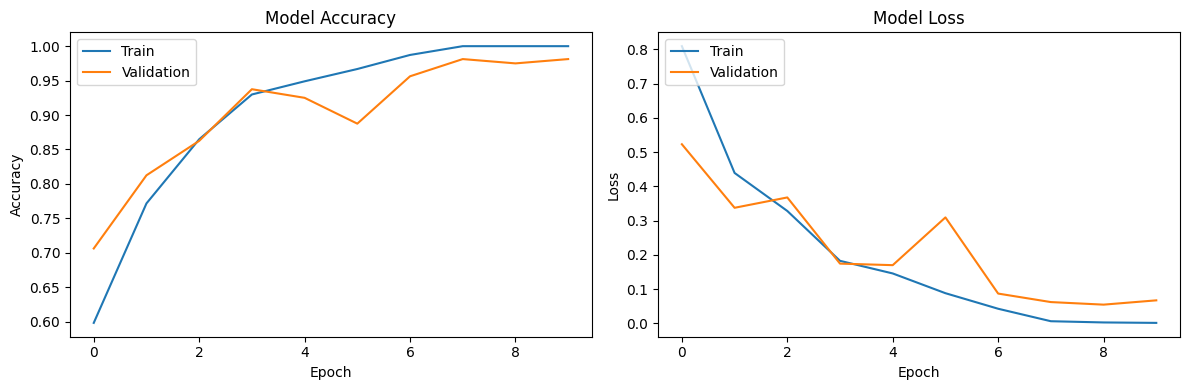

In [12]:
import matplotlib.pyplot as plt
# Plot akurasi dan loss selama pelatihan
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Menguji model

Found 170 images belonging to 3 classes.
170/170 [==============================] - 1s 3ms/step - loss: 0.1235 - accuracy: 0.9588

Test Loss: 0.1234545111656189
Test Accuracy: 0.9588235020637512

Classification Report:
              precision    recall  f1-score   support

       basah       1.00      1.00      1.00        55
      kering       0.91      0.96      0.94        55
      medium       0.96      0.92      0.94        60

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



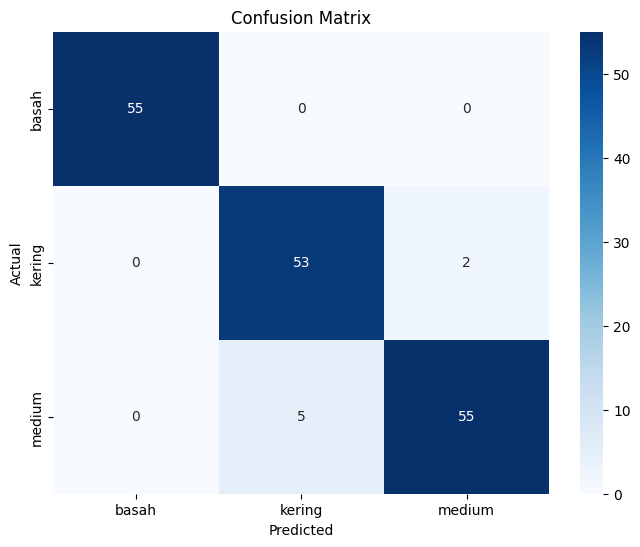

In [50]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path folder test
test_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test"

# Load the best model
model_path = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\models\best_model.h5"
model = load_model(model_path)
IMG_WIDTH = 256 
IMG_HEIGHT = 256

# Data generator untuk test (tanpa augmentasi, hanya rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=1,  # Batch size 1 untuk prediksi per gambar
    class_mode='categorical',
    shuffle=False  # Jangan diacak agar prediksi sesuai urutan gambar
)

# Menggunakan model untuk memprediksi data test
predictions = model.predict(test_generator, steps=test_generator.samples)

# Konversi prediksi ke label
predicted_classes = predictions.argmax(axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Evaluasi model dengan data test
test_loss, test_accuracy = model.evaluate(test_generator)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Menampilkan hasil prediksi
print("\nClassification Report:")
cr = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(cr)

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Correctly Classified Samples:


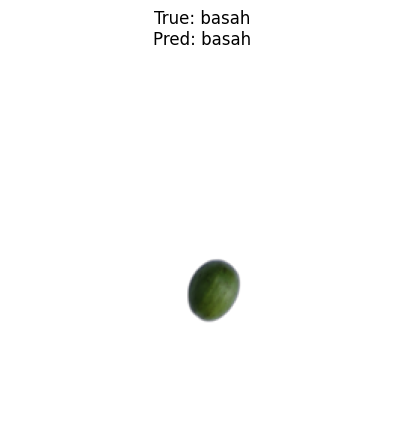

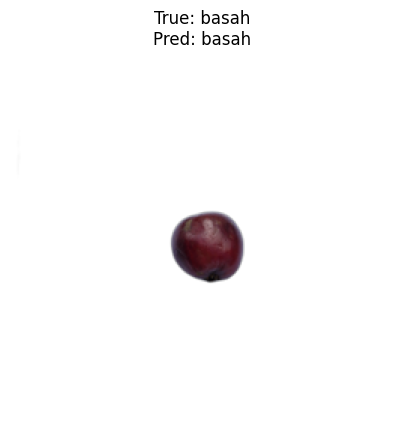

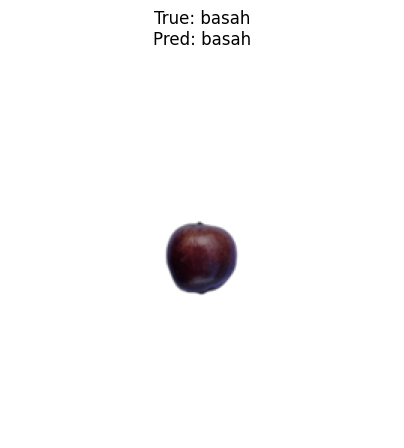

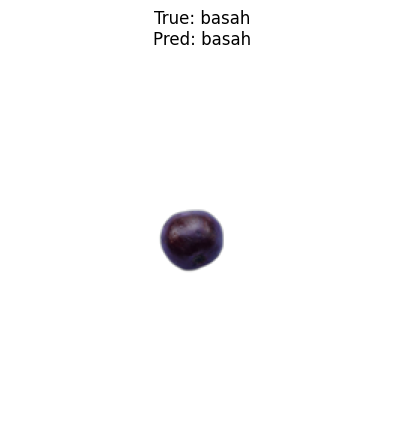

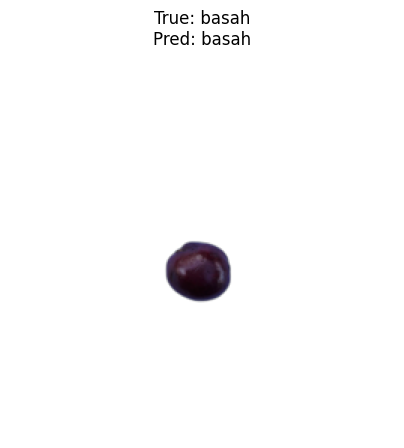


Misclassified Samples:


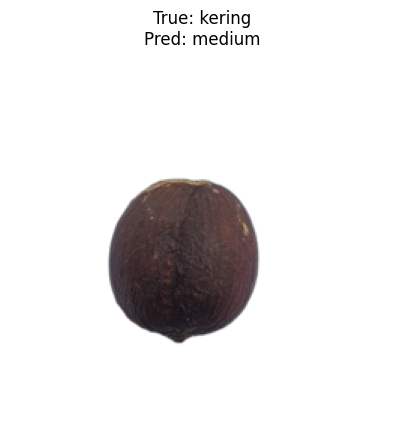

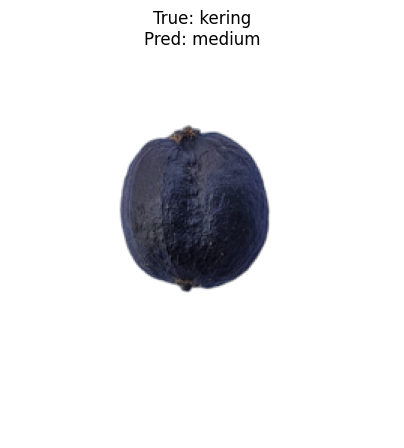

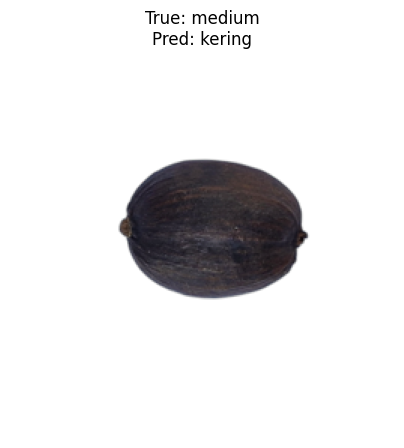

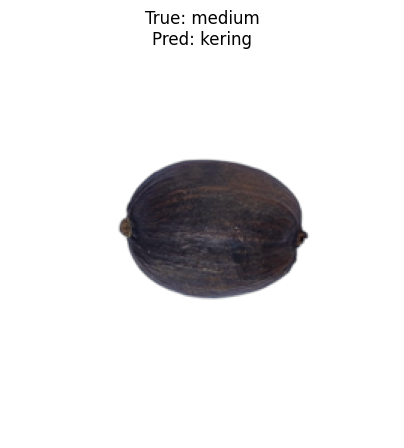

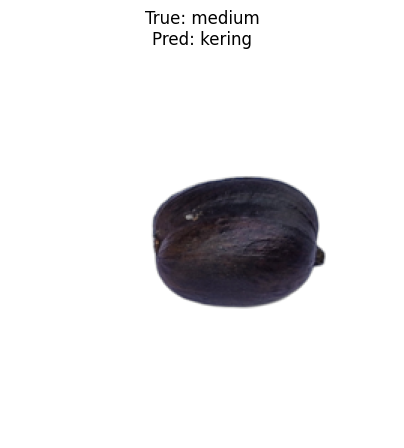

In [53]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Buat DataFrame untuk analisis hasil
file_paths = test_generator.filepaths
results_df = pd.DataFrame({
    'Filepath': file_paths,
    'True Label': [class_labels[i] for i in true_classes],
    'Predicted Label': [class_labels[i] for i in predicted_classes]
})

# Pisahkan data yang benar dan salah klasifikasi
correctly_classified = results_df[results_df['True Label'] == results_df['Predicted Label']]
misclassified = results_df[results_df['True Label'] != results_df['Predicted Label']]

# Tampilkan gambar benar dan salah klasifikasi satu per satu
def display_samples_one_by_one(df, title, n=5):
    print(f"\n{title}:")
    for i in range(min(n, len(df))):
        row = df.iloc[i]
        img = Image.open(row['Filepath'])
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {row['True Label']}\nPred: {row['Predicted Label']}")
        plt.show()

# Tampilkan gambar benar klasifikasi satu per satu
display_samples_one_by_one(correctly_classified, "Correctly Classified Samples")

# Tampilkan gambar salah klasifikasi satu per satu
display_samples_one_by_one(misclassified, "Misclassified Samples")




Total salah prediksi: 9


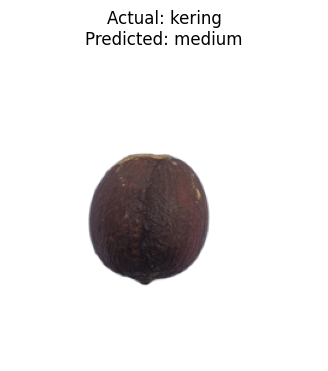

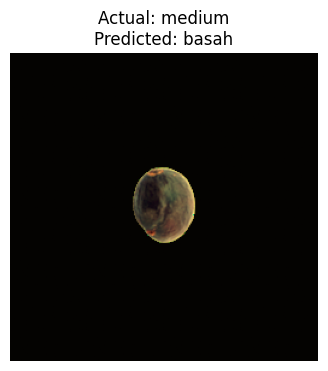

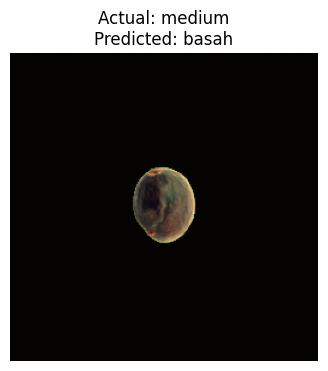

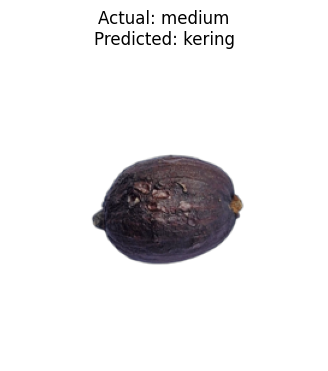

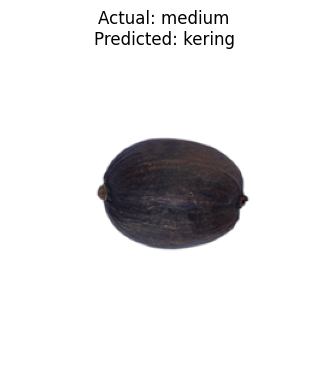

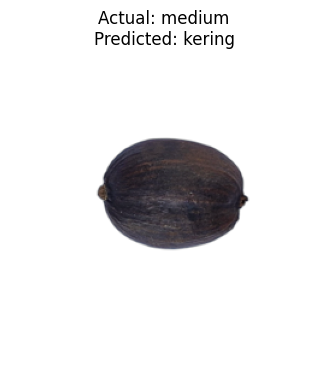

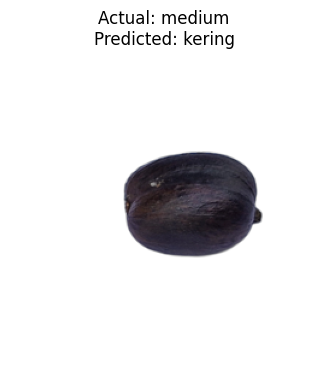

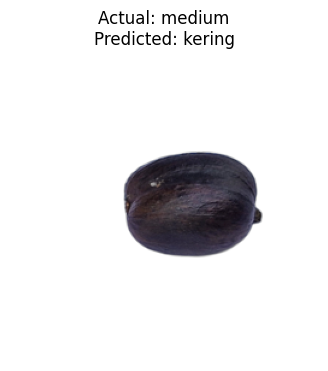

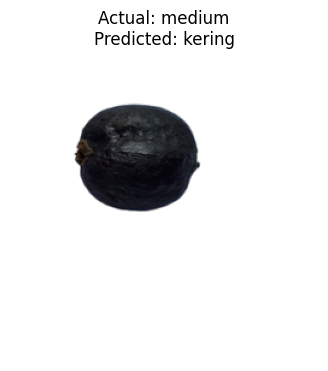

In [15]:
import os
import matplotlib.pyplot as plt

# Prediksi kelas dari data test
predicted_classes = predictions.argmax(axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Ambil file path dari test data
test_image_paths = [os.path.join(test_dir, fname) for fname in test_generator.filenames]

# Temukan indeks gambar yang salah diprediksi
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Menampilkan gambar yang salah diprediksi
print(f"\nTotal salah prediksi: {len(misclassified_indices)}")
for idx in misclassified_indices:
    image_path = test_image_paths[idx]
    actual_class = class_labels[true_classes[idx]]
    predicted_class = class_labels[predicted_classes[idx]]
    
    # Load gambar
    image = plt.imread(image_path)
    
    # Tampilkan gambar beserta informasi prediksi
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
    plt.show()


# **Model VGG16**

Found 784 images belonging to 3 classes.
Found 168 images belonging to 3 classes.
Epoch 1/30
49/49 [==============================] - 8s 140ms/step - loss: 0.6193 - accuracy: 0.7334 - val_loss: 0.2849 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/30
49/49 [==============================] - 7s 134ms/step - loss: 0.2645 - accuracy: 0.8903 - val_loss: 0.2441 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 3/30
49/49 [==============================] - 7s 132ms/step - loss: 0.1534 - accuracy: 0.9503 - val_loss: 0.1262 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 4/30
49/49 [==============================] - 7s 135ms/step - loss: 0.1274 - accuracy: 0.9617 - val_loss: 0.0832 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/30
49/49 [==============================] - 7s 133ms/step - loss: 0.0831 - accuracy: 0.9809 - val_loss: 0.1199 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 6/30
49/49 [==============================] - 11s 215ms/step - loss: 0.0777 - accuracy: 0.9758 - val_loss: 0.1153 - val_accuracy: 0.9500 

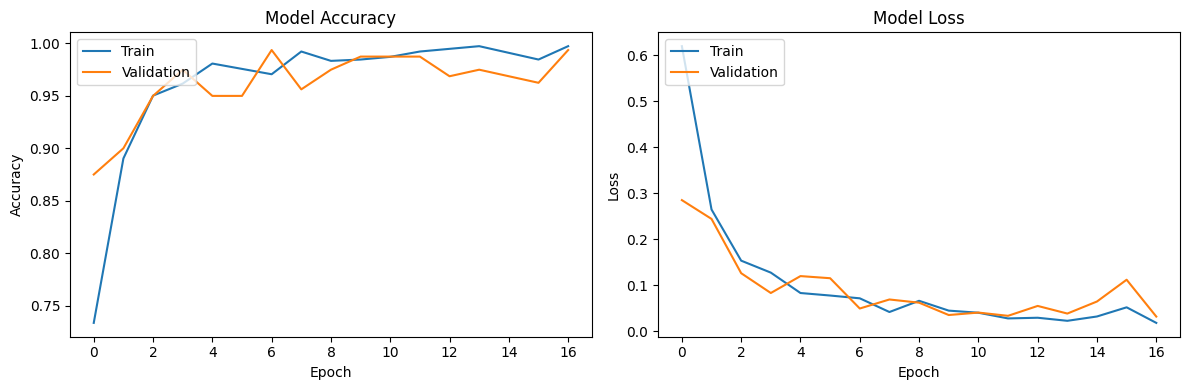

In [16]:
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Enable memory growth for GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Parameters
IMG_WIDTH, IMG_HEIGHT = 256, 256  # VGG16 preferred size
BATCH_SIZE = 16
NUM_CLASSES = 3

# Data paths
train_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\train"
val_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\val"

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

# Load data using generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        mode='max'
    ),
    ModelCheckpoint(
        'best_vgg16_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max'
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# Calculate steps per epoch
STEPS_PER_EPOCH = train_generator.samples // BATCH_SIZE
VALIDATION_STEPS = validation_generator.samples // BATCH_SIZE

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)

# Evaluate model
evaluation = model.evaluate(validation_generator)
print("\nValidation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

# Save final model
model.save('final_vgg16_model.h5')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Menguji model

Found 170 images belonging to 3 classes.
11/11 [==============================] - 2s 161ms/step - loss: 0.0943 - accuracy: 0.9647

Test Loss: 0.09425793588161469
Test Accuracy: 0.9647058844566345
11/11 [==============================] - 1s 91ms/step

Classification Report:
              precision    recall  f1-score   support

       basah       1.00      1.00      1.00        55
      kering       0.95      0.95      0.95        55
      medium       0.95      0.95      0.95        60

    accuracy                           0.96       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.96      0.96      0.96       170



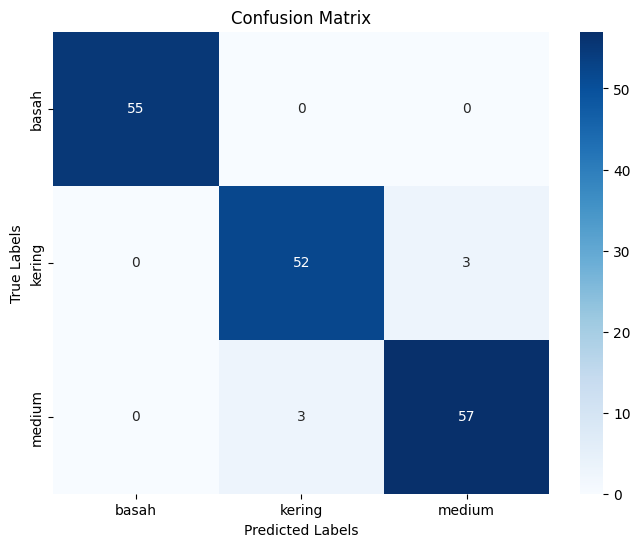

In [44]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Path to test data and model
test_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test"
model_path = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\models\final_vgg16_model.h5"

# Load the VGG16 model
model = load_model(model_path)

# Constants for image dimensions
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 16

# Test data generator (without augmentation)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # No shuffle for ordered evaluation
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict using the model
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Create a DataFrame for analysis
file_paths = test_generator.filepaths
results_df = pd.DataFrame({
    'Filepath': file_paths,
    'True Label': [class_labels[i] for i in true_classes],
    'Predicted Label': [class_labels[i] for i in predicted_classes]
})

# Separate correctly and incorrectly classified samples
correctly_classified = results_df[results_df['True Label'] == results_df['Predicted Label']]
misclassified = results_df[results_df['True Label'] != results_df['Predicted Label']]

# Display Classification Report
print("\nClassification Report:")
cr = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(cr)

# Display Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Augmentasi pada data yang salah**


Total salah prediksi: 6


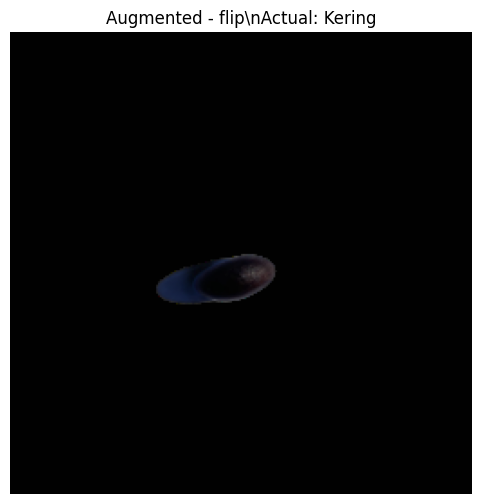

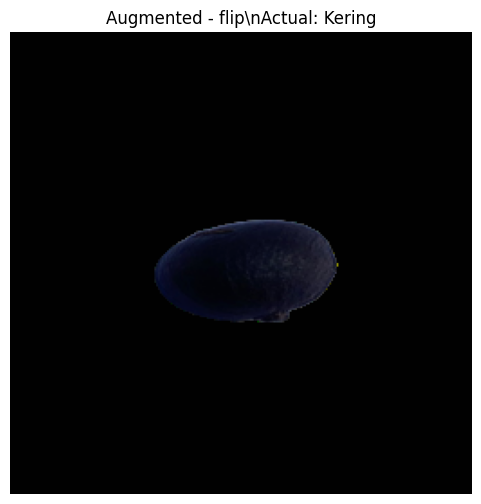

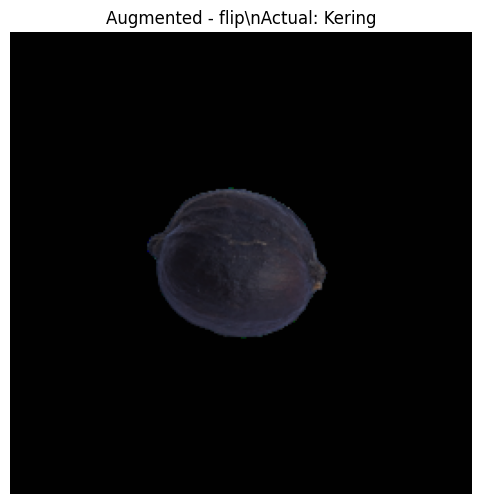

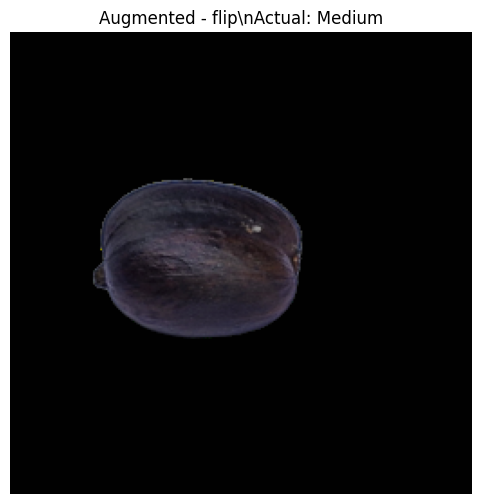

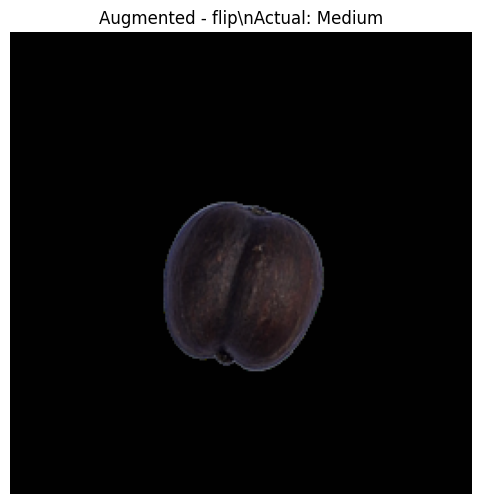

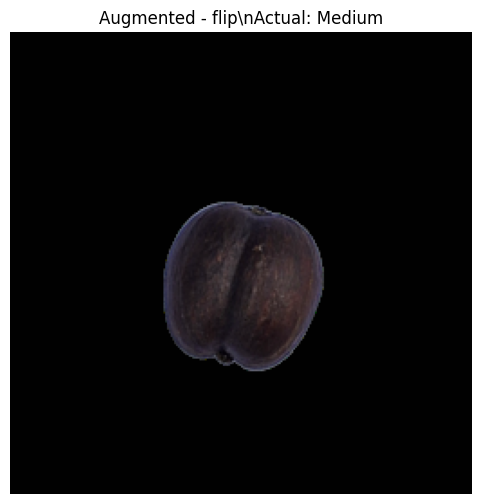


Augmented images saved successfully.
Found 6 validated image filenames.
6/6 [==============================] - 0s 46ms/step

Hasil Prediksi Ulang untuk Gambar Augmentasi:
Gambar: aug_flip_kering_157.png | Prediksi: Kering
Gambar: aug_flip_kering_167.png | Prediksi: Kering
Gambar: aug_flip_kering_68.png | Prediksi: Medium
Gambar: aug_flip_medium_23.png | Prediksi: Medium
Gambar: aug_flip_medium_66.png | Prediksi: Kering
Gambar: aug_flip_medium_66_adjusted_162.png | Prediksi: Kering


In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance
from skimage.feature import graycomatrix, graycoprops
from skimage.util import random_noise
from skimage.transform import rotate, warp, AffineTransform
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import pandas as pd

# Rata-rata warna untuk setiap kelas
color_means = {
    "Basah": (3.2474795482197747, 2.6186393362576843, 2.2371291697351006),
    "Medium": (8.427930774110736, 7.198564163362137, 7.930253847680911),
    "Kering": (9.694942304823133, 8.516959550645616, 9.547428682115342)
}

# Fitur tekstur rata-rata untuk setiap kelas
texture_means = {
    "Basah": {"Contrast": 5.652952895639131, "Dissimilarity": 0.21050439301403623, 
              "Homogeneity": 0.9786716994365011, "Energy": 0.9719863544059892, "Correlation": 0.9669931445962945},
    "Medium": {"Contrast": 23.25580955077739, "Dissimilarity": 0.9513924477619332, 
               "Homogeneity": 0.9079123644130608, "Energy": 0.8888423478548957, "Correlation": 0.9678844115850755},
    "Kering": {"Contrast": 20.237242647058828, "Dissimilarity": 0.9328611791938998, 
               "Homogeneity": 0.8909867292077311, "Energy": 0.8592144373543278, "Correlation": 0.972726977355517}
}

# Fungsi untuk menghitung fitur tekstur menggunakan GLCM
def calculate_texture_features(image):
    # Konversi gambar ke array numpy jika diperlukan
    if isinstance(image, Image.Image):  # Jika gambar adalah objek PIL
        image = np.array(image)

    # Validasi apakah gambar tidak None
    if image is None:
        raise ValueError("Image is None. Periksa path gambar atau proses sebelumnya.")

    # Konversi ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Hitung GLCM
    glcm = graycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    # Hitung fitur tekstur
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return {"Contrast": contrast, "Dissimilarity": dissimilarity, "Homogeneity": homogeneity, 
            "Energy": energy, "Correlation": correlation}

# Fungsi untuk augmentasi dengan metode dari jurnal
def augment_image(image, method):
    """
    Augment a single image using specified method.
    Args:
        image (numpy array): Input image.
        method (str): Augmentation method ('rotate', 'brightness', 'contrast', 'noise', 'elastic', 'flip').
    Returns:
        numpy array: Augmented image.
    """
    if method == 'rotate':
        angle = np.random.uniform(-30, 30)  # Random angle between -30 to 30 degrees
        return rotate(image, angle, mode='wrap')

    elif method == 'brightness':
        factor = np.random.uniform(0.5, 1.5)  # Random brightness factor
        image_pil = Image.fromarray(image.astype('uint8'))
        image_pil = ImageEnhance.Brightness(image_pil).enhance(factor)
        return np.array(image_pil)

    elif method == 'contrast':
        factor = np.random.uniform(0.5, 1.5)  # Random contrast factor
        image_pil = Image.fromarray(image.astype('uint8'))
        image_pil = ImageEnhance.Contrast(image_pil).enhance(factor)
        return np.array(image_pil)

    elif method == 'noise':
        return (random_noise(image, mode='gaussian', var=0.01) * 255).astype('uint8')

    elif method == 'elastic':
        transform = AffineTransform(scale=(1.0, 1.0), rotation=0, shear=0, translation=(5, 5))
        return (warp(image, transform, mode='wrap') * 255).astype('uint8')

    elif method == 'flip':
        return np.flip(image, axis=1)  # Horizontal flip

    else:
        raise ValueError("Invalid augmentation method")

# Fungsi untuk mengubah rata-rata warna gambar
def adjust_image_to_class(image, target_class):
    # Normalisasi nama kelas
    target_class = target_class.capitalize()  # Contoh: 'kering' -> 'Kering'
    if target_class not in color_means:
        raise ValueError(f"Class '{target_class}' tidak ditemukan dalam color_means.")
    
    target_mean = np.array(color_means[target_class])

    # Konversi gambar ke array numpy
    image_array = np.array(image, dtype=np.float32)

    # Hitung rata-rata warna gambar saat ini
    current_mean = image_array.mean(axis=(0, 1))

    # Hitung perbedaan rata-rata warna
    adjustment = target_mean - current_mean

    # Terapkan penyesuaian pada setiap piksel
    adjusted_image_array = image_array + adjustment
    adjusted_image_array = np.clip(adjusted_image_array, 0, 255)

    # Konversi kembali ke gambar
    adjusted_image = adjusted_image_array.astype('uint8')
    return adjusted_image

# Prediksi kelas dari data test
predicted_classes = predictions.argmax(axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Ambil file path dari test data
test_image_paths = [os.path.join(test_dir, fname) for fname in test_generator.filenames]

# Temukan indeks gambar yang salah diprediksi
misclassified_indices = np.where(predicted_classes != true_classes)[0]

# Menampilkan dan mengaugmentasi gambar yang salah diprediksi
print(f"\nTotal salah prediksi: {len(misclassified_indices)}")
augmented_image_paths = []
methods = ['rotate', 'brightness', 'contrast', 'noise', 'elastic', 'flip']

for idx in misclassified_indices:
    image_path = test_image_paths[idx]
    actual_class = class_labels[true_classes[idx]].capitalize()
    predicted_class = class_labels[predicted_classes[idx]].capitalize()

    # Validasi file path
    if not os.path.exists(image_path):
        print(f"File tidak ditemukan: {image_path}")
        continue

    # Load gambar
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Augmentasi gambar menggunakan metode dari jurnal
    for method in methods:
        try:
            augmented_image = augment_image(image, method)
        except ValueError as e:
            print(e)
            continue

    # Simpan hasil augmentasi
    try:
        # Konversi gambar ke uint8 jika diperlukan
        if augmented_image.dtype != np.uint8:
            augmented_image = (augmented_image * 255).astype(np.uint8)  # Untuk skala 0-1 seperti dari warp atau noise

        save_path = os.path.join(r"C:\\Users\\FALL-NOU\\Documents\\KULIAH\\SEMESTER 7\\MachineLearning\\dataset\\augmented_images", f"aug_{method}_{os.path.basename(image_path)}")
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        cv2.imwrite(save_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
        augmented_image_paths.append(save_path)

        # Tampilkan gambar augmentasi
        plt.figure(figsize=(6, 6))
        plt.imshow(augmented_image)
        plt.axis('off')
        plt.title(f"Augmented - {method}\\nActual: {actual_class}")
        plt.show()

    except Exception as e:
        print(f"Error processing image {method}: {e}")
        continue


print("\nAugmented images saved successfully.")

# Buat data generator untuk gambar yang diaugmentasi
augmented_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

df_augmented = pd.DataFrame({'filename': augmented_image_paths})

augmented_generator = augmented_datagen.flow_from_dataframe(
    dataframe=df_augmented,
    x_col='filename',
    directory=None,
    target_size=(256, 256),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

# Prediksi ulang untuk gambar yang telah diaugmentasi
augmented_predictions = model.predict(augmented_generator)
augmented_predicted_classes = augmented_predictions.argmax(axis=1)

# Tampilkan hasil prediksi ulang
print("\nHasil Prediksi Ulang untuk Gambar Augmentasi:")
for i, path in enumerate(augmented_image_paths):
    predicted_class = class_labels[augmented_predicted_classes[i]].capitalize()
    print(f"Gambar: {os.path.basename(path)} | Prediksi: {predicted_class}")


## Sesudah augmentasi Model CNN

Found 170 images belonging to 3 classes.
170/170 [==============================] - 1s 3ms/step - loss: 0.1303 - accuracy: 0.9529

Test Loss: 0.13027618825435638
Test Accuracy: 0.9529411792755127

Classification Report:
              precision    recall  f1-score   support

       basah       0.98      1.00      0.99        55
      kering       0.91      0.95      0.93        55
      medium       0.96      0.92      0.94        60

    accuracy                           0.95       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



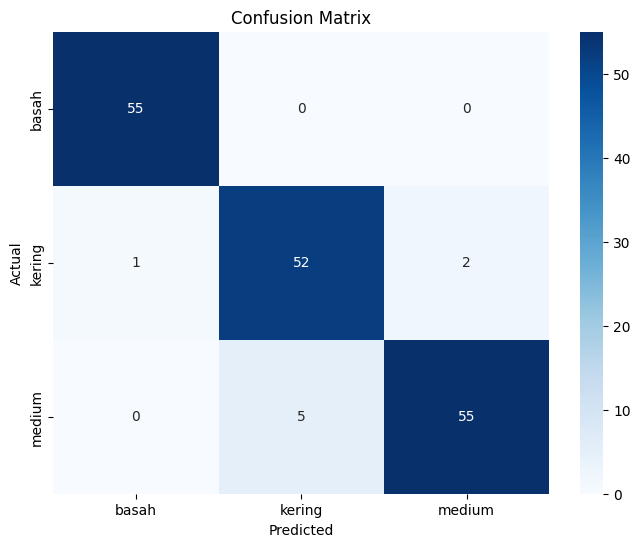

In [48]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path folder test
test_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test"

# Load the best model
model_path = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\models\best_model.h5"
model = load_model(model_path)
IMG_WIDTH = 256 
IMG_HEIGHT = 256

# Data generator untuk test (tanpa augmentasi, hanya rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=1,  # Batch size 1 untuk prediksi per gambar
    class_mode='categorical',
    shuffle=False  # Jangan diacak agar prediksi sesuai urutan gambar
)

# Menggunakan model untuk memprediksi data test
predictions = model.predict(test_generator, steps=test_generator.samples)

# Konversi prediksi ke label
predicted_classes = predictions.argmax(axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Evaluasi model dengan data test
test_loss, test_accuracy = model.evaluate(test_generator)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Menampilkan hasil prediksi
print("\nClassification Report:")
cr = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(cr)

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Sesudah augmentasi Model Vgg16

Found 170 images belonging to 3 classes.
11/11 [==============================] - 2s 133ms/step - loss: 0.0781 - accuracy: 0.9824

Test Loss: 0.07807787507772446
Test Accuracy: 0.9823529124259949
11/11 [==============================] - 1s 89ms/step

Classification Report:
              precision    recall  f1-score   support

       basah       1.00      1.00      1.00        55
      kering       0.96      0.98      0.97        55
      medium       0.98      0.97      0.97        60

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



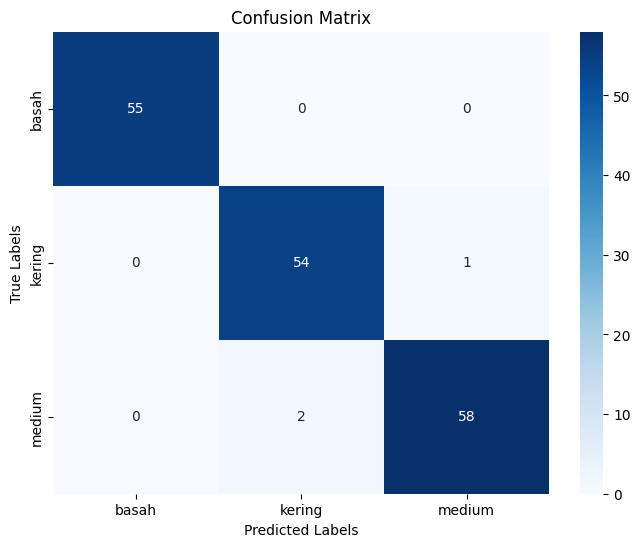


Correctly Classified Samples:


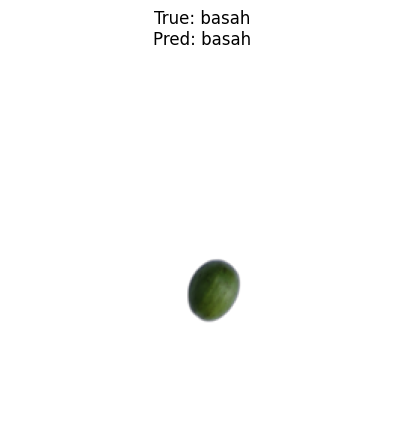

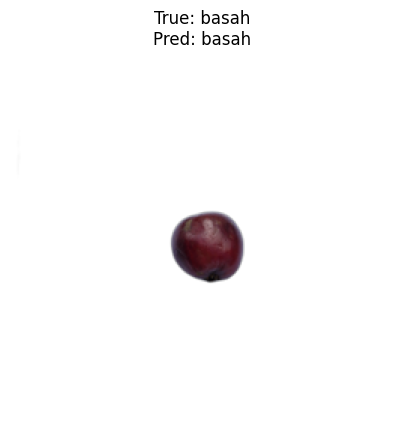

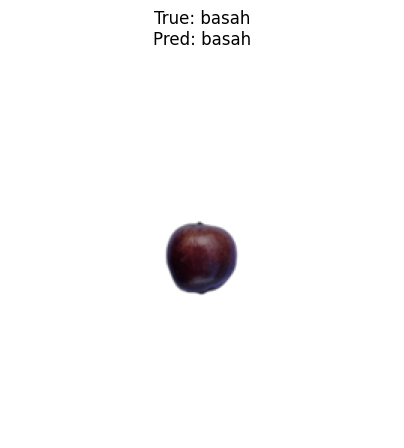

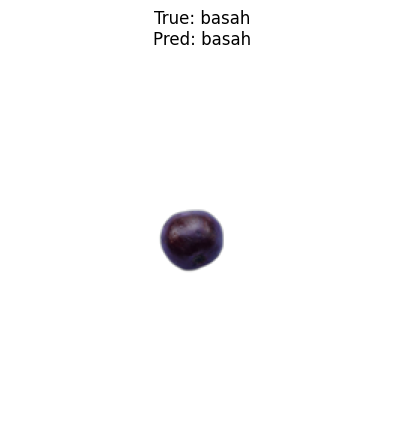

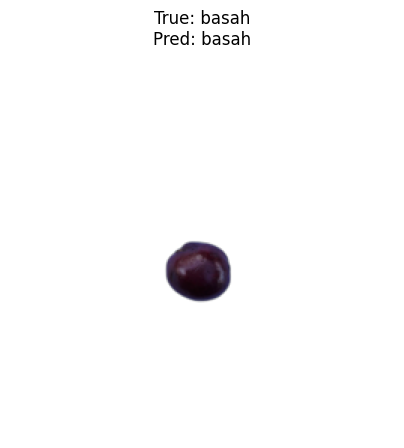


Misclassified Samples:


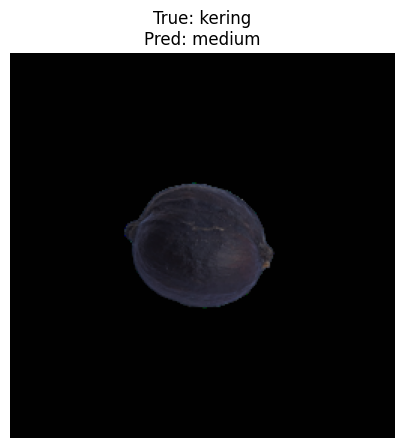

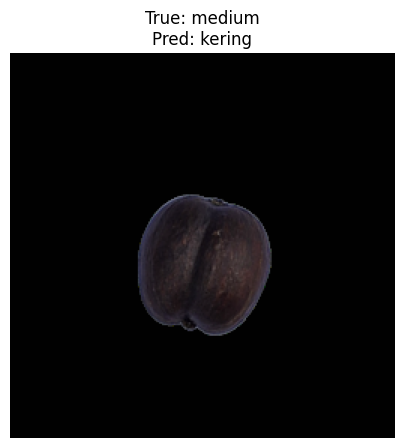

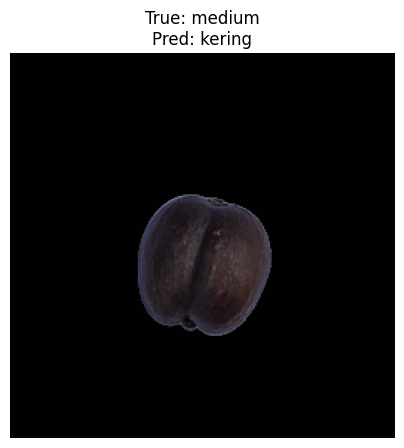

In [37]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Path to test data and model
test_dir = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\dataset\dataset_split\test"
model_path = r"C:\Users\FALL-NOU\Documents\KULIAH\SEMESTER 7\MachineLearning\models\final_vgg16_model.h5"

# Load the VGG16 model
model = load_model(model_path)

# Constants for image dimensions
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 16

# Test data generator (without augmentation)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # No shuffle for ordered evaluation
)

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print("\nTest Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict using the model
predictions = model.predict(test_generator)
predicted_classes = predictions.argmax(axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Create a DataFrame for analysis
file_paths = test_generator.filepaths
results_df = pd.DataFrame({
    'Filepath': file_paths,
    'True Label': [class_labels[i] for i in true_classes],
    'Predicted Label': [class_labels[i] for i in predicted_classes]
})

# Separate correctly and incorrectly classified samples
correctly_classified = results_df[results_df['True Label'] == results_df['Predicted Label']]
misclassified = results_df[results_df['True Label'] != results_df['Predicted Label']]

# Display Classification Report
print("\nClassification Report:")
cr = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(cr)

# Display Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Function to display samples one by one
def display_samples_one_by_one(df, title, n=5):
    print(f"\n{title}:")
    for i in range(min(n, len(df))):
        row = df.iloc[i]
        img = Image.open(row['Filepath'])
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {row['True Label']}\nPred: {row['Predicted Label']}")
        plt.show()

# Display correctly classified samples
display_samples_one_by_one(correctly_classified, "Correctly Classified Samples")

# Display misclassified samples
display_samples_one_by_one(misclassified, "Misclassified Samples")


c:\Users\FALL-NOU\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\FALL-NOU\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\FALL-NOU\anaconda3\envs\py310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.5.1 when using version 1.5.2. Th

Found 170 images belonging to 3 classes.
170/170 [==============================] - 1s 3ms/step - loss: 0.1235 - accuracy: 0.9588
Found 170 images belonging to 3 classes.
11/11 [==============================] - 1s 91ms/step - loss: 0.0943 - accuracy: 0.9647


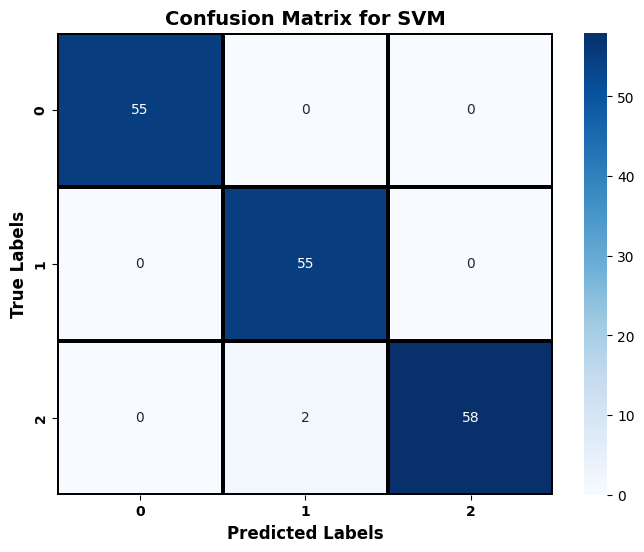

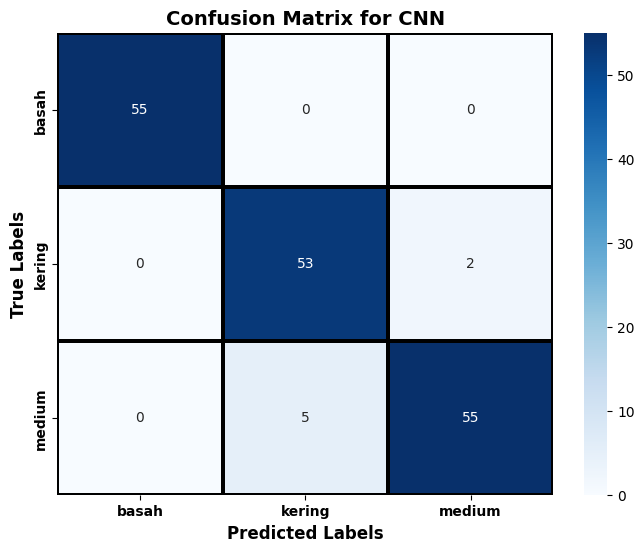

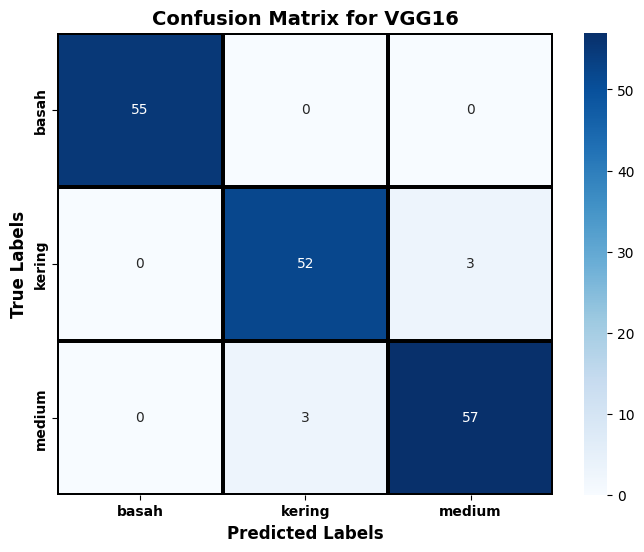

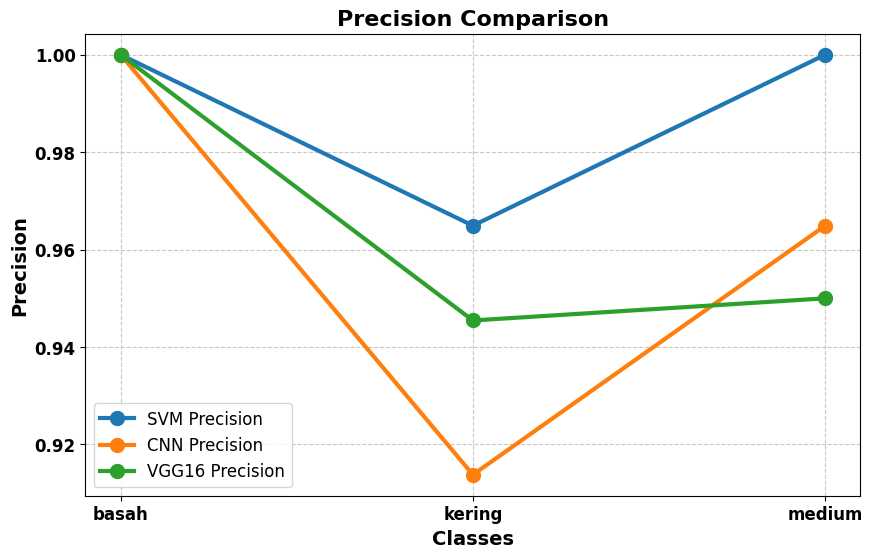

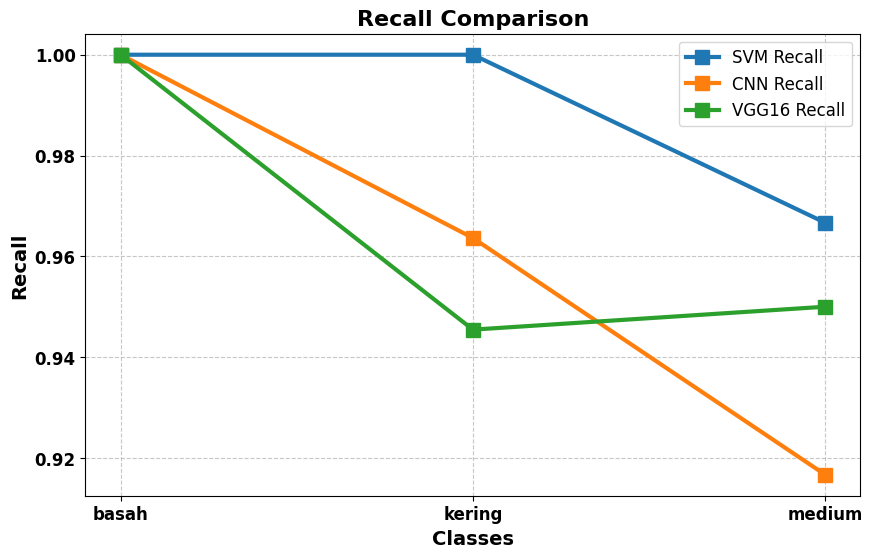

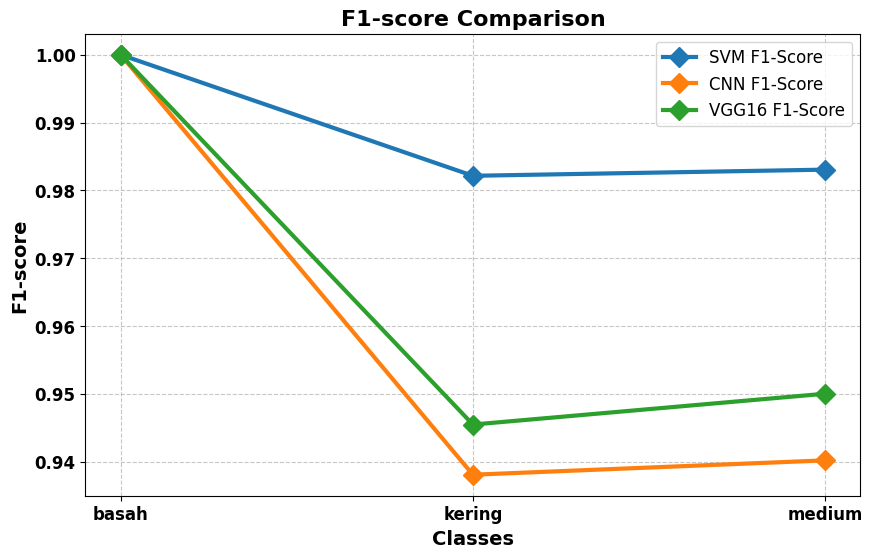

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib

# Paths to the models
svm_model_path = r"C:\\Users\\FALL-NOU\\Documents\\KULIAH\\SEMESTER 7\\MachineLearning\\models\\best_svm_model_with_scaler.joblib"
cnn_model_path = r"C:\\Users\\FALL-NOU\\Documents\\KULIAH\\SEMESTER 7\\MachineLearning\\models\\best_model.h5"
vgg16_model_path = r"C:\\Users\\FALL-NOU\\Documents\\KULIAH\\SEMESTER 7\\MachineLearning\\models\\final_vgg16_model.h5"

# Paths to test data
test_csv_path = r"C:\\Users\\FALL-NOU\\Documents\\KULIAH\\SEMESTER 7\\MachineLearning\\dataframe_extraksi\\test_features_updated.csv"
test_dir = r"C:\\Users\\FALL-NOU\\Documents\\KULIAH\\SEMESTER 7\\MachineLearning\\dataset\\dataset_split\\test"

# Constants for image dimensions
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 16

# Load SVM model
svm_model = joblib.load(svm_model_path)

# Load SVM test data
test_data = pd.read_csv(test_csv_path)
feature_columns = [
    'r_mean', 'r_std', 'r_q1', 'r_q3', 'r_range',
    'g_mean', 'g_std', 'g_q1', 'g_q3', 'g_range',
    'b_mean', 'b_std', 'b_q1', 'b_q3', 'b_range',
    'h_mean', 'h_std', 's_mean', 's_std', 'v_mean', 'v_std',
    'l_mean', 'l_std', 'a_mean', 'a_std',
    'contrast_d1_a0', 'contrast_d1_a45', 'contrast_d1_a90', 'contrast_d1_a135',
    'contrast_d3_a0', 'contrast_d3_a45', 'contrast_d3_a90', 'contrast_d3_a135',
    'contrast_d5_a0', 'contrast_d5_a45', 'contrast_d5_a90', 'contrast_d5_a135',
    'dissimilarity_d1_a0', 'dissimilarity_d1_a45', 'dissimilarity_d1_a90', 'dissimilarity_d1_a135',
    'dissimilarity_d3_a0', 'dissimilarity_d3_a45', 'dissimilarity_d3_a90', 'dissimilarity_d3_a135',
    'dissimilarity_d5_a0', 'dissimilarity_d5_a45', 'dissimilarity_d5_a90', 'dissimilarity_d5_a135',
    'homogeneity_d1_a0', 'homogeneity_d1_a45', 'homogeneity_d1_a90', 'homogeneity_d1_a135',
    'homogeneity_d3_a0', 'homogeneity_d3_a45', 'homogeneity_d3_a90', 'homogeneity_d3_a135',
    'homogeneity_d5_a0', 'homogeneity_d5_a45', 'homogeneity_d5_a90', 'homogeneity_d5_a135',
    'energy_d1_a0', 'energy_d1_a45', 'energy_d1_a90', 'energy_d1_a135',
    'energy_d3_a0', 'energy_d3_a45', 'energy_d3_a90', 'energy_d3_a135',
    'energy_d5_a0', 'energy_d5_a45', 'energy_d5_a90', 'energy_d5_a135',
    'correlation_d1_a0', 'correlation_d1_a45', 'correlation_d1_a90', 'correlation_d1_a135',
    'correlation_d3_a0', 'correlation_d3_a45', 'correlation_d3_a90', 'correlation_d3_a135',
    'correlation_d5_a0', 'correlation_d5_a45', 'correlation_d5_a90', 'correlation_d5_a135',
    'ASM_d1_a0', 'ASM_d1_a45', 'ASM_d1_a90', 'ASM_d1_a135',
    'ASM_d3_a0', 'ASM_d3_a45', 'ASM_d3_a90', 'ASM_d3_a135',
    'ASM_d5_a0', 'ASM_d5_a45', 'ASM_d5_a90', 'ASM_d5_a135'
]
X_svm = test_data[feature_columns]
true_labels_svm = test_data['label']
predicted_labels_svm = svm_model.predict(X_svm)
cm_svm = confusion_matrix(true_labels_svm, predicted_labels_svm)
cr_svm = classification_report(true_labels_svm, predicted_labels_svm, output_dict=True)

# CNN Evaluation
def evaluate_cnn_model(model_path, test_dir):
    model = load_model(model_path)
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=1,
        class_mode='categorical',
        shuffle=False
    )
    predictions = model.predict(test_generator, steps=test_generator.samples)
    predicted_classes = predictions.argmax(axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())
    test_loss, test_accuracy = model.evaluate(test_generator)
    cm = confusion_matrix(true_classes, predicted_classes)
    cr = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    return test_loss, test_accuracy, cm, cr, class_labels

cnn_loss, cnn_accuracy, cm_cnn, cr_cnn, class_labels_cnn = evaluate_cnn_model(cnn_model_path, test_dir)

# VGG16 Evaluation
def evaluate_vgg_model(model_path, test_dir):
    model = load_model(model_path)
    test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=False
    )
    predictions = model.predict(test_generator)
    predicted_classes = predictions.argmax(axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())
    test_loss, test_accuracy = model.evaluate(test_generator)
    cm = confusion_matrix(true_classes, predicted_classes)
    cr = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    return test_loss, test_accuracy, cm, cr, class_labels

vgg16_loss, vgg16_accuracy, cm_vgg16, cr_vgg16, class_labels_vgg16 = evaluate_vgg_model(vgg16_model_path, test_dir)

# Combine results
results = {
    'SVM': {'loss': None, 'accuracy': None, 'confusion_matrix': cm_svm, 'classification_report': cr_svm},
    'CNN': {'loss': cnn_loss, 'accuracy': cnn_accuracy, 'confusion_matrix': cm_cnn, 'classification_report': cr_cnn},
    'VGG16': {'loss': vgg16_loss, 'accuracy': vgg16_accuracy, 'confusion_matrix': cm_vgg16, 'classification_report': cr_vgg16}
}

# Plot Confusion Matrices
for model, result in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        result['confusion_matrix'], 
        annot=True, 
        fmt='d', 
        cmap='Blues', 
        xticklabels=(class_labels_cnn if model == 'CNN' else class_labels_vgg16 if model == 'VGG16' else sorted(true_labels_svm.unique())),
        yticklabels=(class_labels_cnn if model == 'CNN' else class_labels_vgg16 if model == 'VGG16' else sorted(true_labels_svm.unique())),
        linewidths=1.5,  # Tebalkan garis antar kotak
        linecolor='black'  # Warna garis antar kotak
    )
    plt.title(f'Confusion Matrix for {model}', fontsize=14, fontweight='bold')  # Perbesar teks judul
    plt.xlabel('Predicted Labels', fontsize=12, fontweight='bold')  # Perbesar teks label X
    plt.ylabel('True Labels', fontsize=12, fontweight='bold')  # Perbesar teks label Y
    plt.xticks(fontsize=10, fontweight='bold')  # Perbesar teks pada sumbu X
    plt.yticks(fontsize=10, fontweight='bold')  # Perbesar teks pada sumbu Y
    plt.show()


# Plot Precision, Recall, and F1-Score for each model
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    for model, result in results.items():
        if model == 'SVM':
            scores = [result['classification_report'][str(label)][metric] for label in sorted(true_labels_svm.unique())]
            labels = sorted(true_labels_svm.unique())
        else:
            scores = [result['classification_report'][label][metric] for label in (class_labels_cnn if model == 'CNN' else class_labels_vgg16)]
            labels = class_labels_cnn if model == 'CNN' else class_labels_vgg16

        # Penyesuaian visual berdasarkan metrik
        if metric == 'precision':
            plt.plot(labels, scores, marker='o', linewidth=3, markersize=10, label=f'{model} Precision')
        elif metric == 'recall':
            plt.plot(labels, scores, marker='s', linewidth=3, markersize=10, label=f'{model} Recall')
        elif metric == 'f1-score':
            plt.plot(labels, scores, marker='D', linewidth=3, markersize=10, label=f'{model} F1-Score')

    # Pengaturan visual
    plt.title(f'{metric.capitalize()} Comparison', fontsize=16, fontweight='bold')  # Judul besar dan tebal
    plt.xlabel('Classes', fontsize=14, fontweight='bold')  # Label X besar dan tebal
    plt.ylabel(metric.capitalize(), fontsize=14, fontweight='bold')  # Label Y besar dan tebal
    plt.xticks(fontsize=12, fontweight='bold')  # Sumbu X besar dan tebal
    plt.yticks(fontsize=12, fontweight='bold')  # Sumbu Y besar dan tebal
    plt.legend(fontsize=12, loc='best')  # Legenda besar dan jelas
    plt.grid(True, linestyle='--', alpha=0.7)  # Grid untuk memperjelas
    plt.show()

